In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('mode.chained_assignment', 'raise')


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


from IPython.display import Image
import requests
from IPython import display

### To be ran after 1. Table_Simulation.ipynb and 2. Visualisation.ipynb.

### *Note: Repeated code but with different variables/on a different metric is collapsed to prevent cluttering of the notebook. It can be expanded by selecting the cell and pressing 'edit' (in the top left) and 'Toggle hide input of cells' in the drop-down. A cell with a hidden input has three dots to the left of the cell in the margin.*


** By Max Laverty and Ollie Cope, 2021**

# Does Decriminalising Drugs Help?

## Analysis Contents
- Introduction
- Section 1: Does formal (de jure) decriminalisation of drugs affect overdose rates and administrative burden on prosecution of addicts?
    - 1.1 Intro: 'Has it worked?'
    - 1.1 Results
    - 1.2 Intro: 'Does it work when it is introduced?'
    - 1.2 Results
    - 1.3 Summary: 'Does decriminalisation work - 'now' and 'then'?'
- Section 2:
    - 2.1 Intro: How reliable is our key?
    - 2.2 Intro : 'Are decriminalised countries more lenient?'
    - 2.2 Results
    - 2.3 Intro : 'Does leniency help?'
    - 2.3 Results
- Conclusion

## Introduction
With the war on drugs gaining notoriety in popular media and waves of cannabis use legalisation across the globe, the topic of the potential harm that strict legal approaches to use and possession of controlled substances is a contentious and popular one.

Decriminalisation is the middle ground between illegal and legal, involving reduced legal penalties.
> "Decriminalisation largely applies to drug use and possession offences, not to the sale or supply of drugs. Arguments in favour of decriminalisation include its focus on drug users rather than drug suppliers. The idea is to provide users with a more humane and sensible response to their drug use."

Source: https://ndarc.med.unsw.edu.au/blog/decriminalisation-or-legalisation-injecting-evidence-drug-law-reform-debate

The 'Drug Policy Alliance' asserts that reduced enforcement, while increasing focus on addict health and rehabiliation rather than criminalisation - that enforcement agencies also benefit due to reduced administrative burden through better management of time, reduced criminal justice costs and reduced incarceration costs.

Source: https://www.unodc.org/documents/ungass2016/Contributions/Civil/DrugPolicyAlliance/DPA_Fact_Sheet_Approaches_to_Decriminalization_Feb2015_1.pdf

The definition for decriminalisation of drugs is loosely interpretted by most, with a clear distinction made versus criminalisation and legalisation of drugs.


**Why is this relevant to us in the UK?**

We are potentially seeing a move in the UK to something called ‘De Facto’ (as opposed to De Jure) decriminalisation of certain drugs like cannabis use. This is where it is still criminalised but law enforcement, whether that’s the courts or the police at the point of crime, decide to pursue the offence. With other Western countries legalising or decriminalising certain substances, and the UK legalising use of medicinal marijuana in 2018 for certain conditions, it is possible that questions about wider legalisation or decriminalisation in the near future are not too far-fetched.

Source: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/753366/Medicinal_Cannabis_-_Home_Office_Circular_2018_FINAL.pdf

>*“It’s illegal to grow and use cannabis and we will still enforce the law. However, what we will try and do is engage with users and help them if that’s what they want.”*

Alan Charles, the police and crime commissioner for Derby UK in 2015
Source: https://www.theguardian.com/society/2015/jul/22/police-wont-target-pot-smokers-small-scale-growers-commissioners

**Understanding decriminalisation and tackling the question**

In order to tackle such a large question, we had to settle on a definition for the loose term of decriminalisation and identify its aims to see if it works at doing what it sets out to do.

The theory following decriminalisation of drugs is that by making use (and or small-quantity possesion) no longer an offence or a much lesser offence, addicts and those at risk are more likely to seek and be offered help without fear of legal reprisal, and organisations providing safety nets for drug use are more easily formed, treating drug use and possession for use as a health issue rather than solely a criminal one.

As such, we decided on useful metrics and trends to examine from EMCDDA (European Monitoring Centre for Drugs and Drug Addiction). **To capture all three potential aspects of decriminalisation of drugs previously mentioned, we looked at overdose deaths reported, number of USE offences reported, and number of offenders reported.** Certain metrics that may have still been useful like supply offences or demographic breakdowns would have required more time and work commitment to analyse so the first three metrics were prioritized.

https://www.emcdda.europa.eu/emcdda-home-page_en

1.EMCDDA for total overdose deaths between 1985 and 2018 for European countries. 

2.EMCDDA for total number of use-related offences reported between 2007 and 2016 for European countries.

3.EMCDDA for total number of offenders between 2007 and 2016 for European countries. 

We quickly realised there were many different factors to explore when looking at decriminalisation. For example, has it worked? Did it work when it was introduced? Are there different approaches to decriminalisation or criminalisation of drugs that yield different results? Are there other reasons for addict and user suffering, and administrative burden?

Following exploration of these trends between criminalised and decriminalised countries, we then sought other factors to add depth to our analysis and explain the trends we observed.

- Code to recreate data tables and explain choices is in the Table_Simulation.ipynb. Run Table_Simulation.ipynb first. Code to recreate visualisations is in the Visualisation.ipynb. Run Visualisation.ipynb second. Run Analysis.ipynb last.

**A different perspective**

The EMCDDA provides data in a non per capita format, and treat each country's problems as separate and distinct. They conduct a lot of analysis between countries, especially for individual drugs and specific approaches (like instituting safe-injection rooms in Paris). The only analysis of formal decriminalisation effects were for individual countries, for example before and after, in EMCDDA data. Our analyses provides a novel perspective.

Is there a difference between those that criminalise and decriminalise drugs? And what about those that have more lenient legal approaches versus strict legal approaches?

**So without further ado, does decriminalisation of drug use and possession of small quantities reduce harm that comes to addicts, and does it alleviate administrative burden on law enforcement agencies?**

In [2]:
# Here is a definitive table outlining drug decriminalisation status, date of formal recognition of drug decriminalisation, their form of system and specific codified law of all countries that provided the EMCDDA some sort of data for our metrics.
europe_criminalisation_status_with_colour = pd.read_csv('europe_criminalisation_status_with_colour.csv').set_index('Country')
europe_criminalisation_status = europe_criminalisation_status_with_colour.iloc[:, 0:4]
europe_criminalisation_status

,Decriminalised,Date of Decriminalisation,Form,Law
Country,,,,
Czechia,Yes,1990.0,De jure,Amendment no. 175/1990 Coll. to the Penal Act ...
Croatia,Yes,2013.0,De jure,Amendments to the Criminal Code 1997.
Estonia,Yes,2002.0,De jure,Act on Narcotic Drugs and Psychotropic Substan...
Germany,Yes,1992.0,De jure,German Federal Narcotics Act (1992 amendment)
Italy,Yes,1990.0,De jure,Decree of the President of the Republic No 309...
Netherlands,Yes,1973.0,De facto,De Facto
Poland,Yes,2013.0,De jure,Amendment to Act on Counteracting Drug Addicti...
Portugal,Yes,2001.0,De jure,Law 30/2000.
Spain,Yes,1983.0,De jure,Ley Organic 8/1983.


## Section 1: Does FORMAL (de jure) decriminalisation of drugs affect overdose rates and administrative burden on prosecution of addicts?

- Prediction: Decriminalisation of drugs will be associated with lower overdose rates, number of use offences and number of offenders compared to criminalised countries.

### **Question 1.1 - Has it worked?**
We ask this question because we want to see if decriminalised countries perform better for addict/user health and enforcement metrics NOW. After time to establish, do countries with decriminalised systems achieve their goals better than those that have stayed criminalised?


To analyse our data to provide an answer to this question, we take a smoothed average of the metric per capita between 2014-2018 and permute between the values of the criminalised countries and the values of the decriminalised countries.

#### Overdoses per capita

The below figure shows an initial visualisation of the data and gives an insight between drug criminalisation status, year and date of decriminalisation. 

*We choose to show this because individual countries can be tracked via unique colours in the key, especially useful for looking at case studies and individual countries.*

More focused plots explore specific trait breakdowns of this 'master' graph.

**Figure: Overdose Deaths Per Capita Per Year of Criminalised and Decriminalised European Countries 1985-2018**

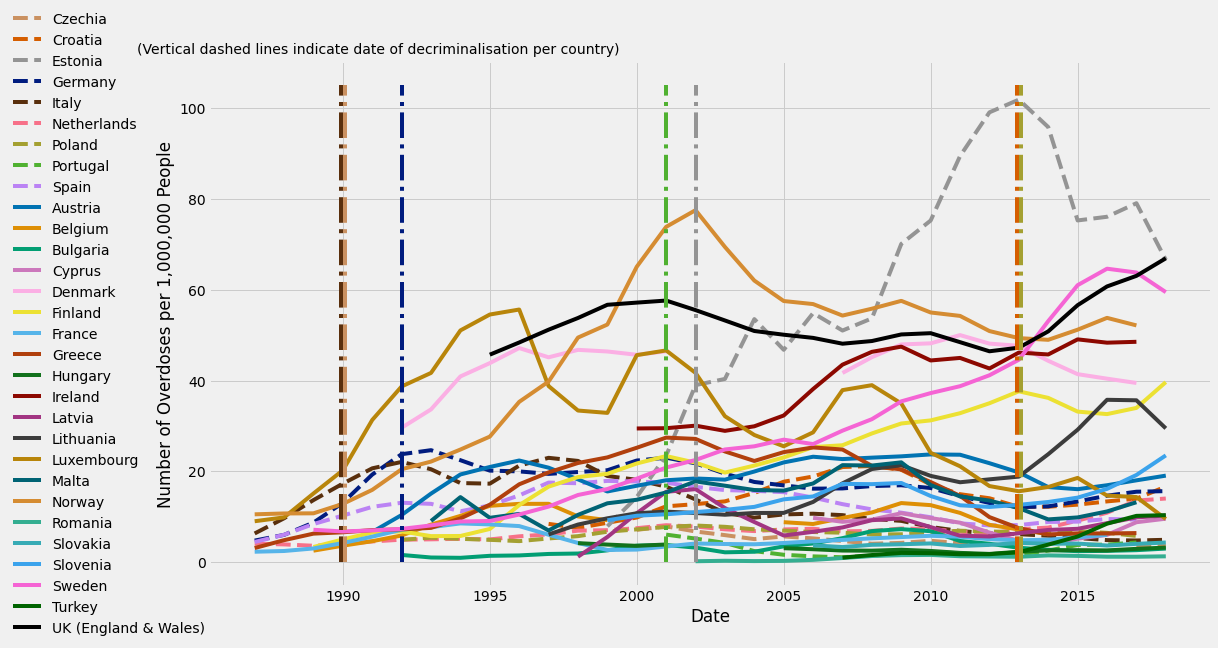

In [3]:
Image(filename='overdosedeathsallcountrieslineplot.png')

>> #### Case study: Estonia's Overdose Deaths

>>> Estonia is marked as the grey dashed line on the graph above for overdose deaths. It seems like its problems start in 1998, and persist to even now. Why is this, and did formal decriminilasation in 2002 make a difference?
>>> Source AP News released a popular article detailing Estonia's drug overdose woes, citing that the vast majority of overdoses were due to a transition from somewhat-safer heroin use to fentanyl laced heroin or fentanyl related concoctions. Different quantity 'requirements', and much higher toxicity/potency per quantity means that mismanagement of fentanyl products is much more common and problematic. A modern boom in China being responsible for synthetic drugs - notably fentanyl - meaning more potent highs with easier (less risky) supply routes and potentially higher profit to suppliers. The reduction in quantity needed to simulate similar effects to heroin means that suppliers and dealers prefer the product as it is less risky to transport, easier to cut and mix (extending profits) and according to the article, once addicts use fentanyl - using heroin is like 'injecting water'. 

>>> Interestingly after decriminalisation, the article mentions increased presence of naloxone (anti overdose drug) and preparedness for overdoses. However the most important point from the article is that the war against fentanyl was 'won' not by decriminalisation, but by finding and shutting down a clandestine fentanyl lab in Estonia. This major raid was conducted in 2017, and while not conclusive, our graph supports the argument that affecting this supply network may be responsible for overdose deaths lowering. This raises supply and criminal enterprise/motivations as a large potential reason for decrease in addict health and increase in suffering.

>>> It's also important to note that Estonia's population is only around 1 million. Could singular events/criminal supply lines affect trends in bigger countries in similar ways?

>>> See image below for quantity to quantity comparison for heroin to fentanyl potency.

Source: https://apnews.com/article/drug-abuse-europe-asia-pacific-china-weekend-reads-be15d6289f39b45742d598f6f65185ce

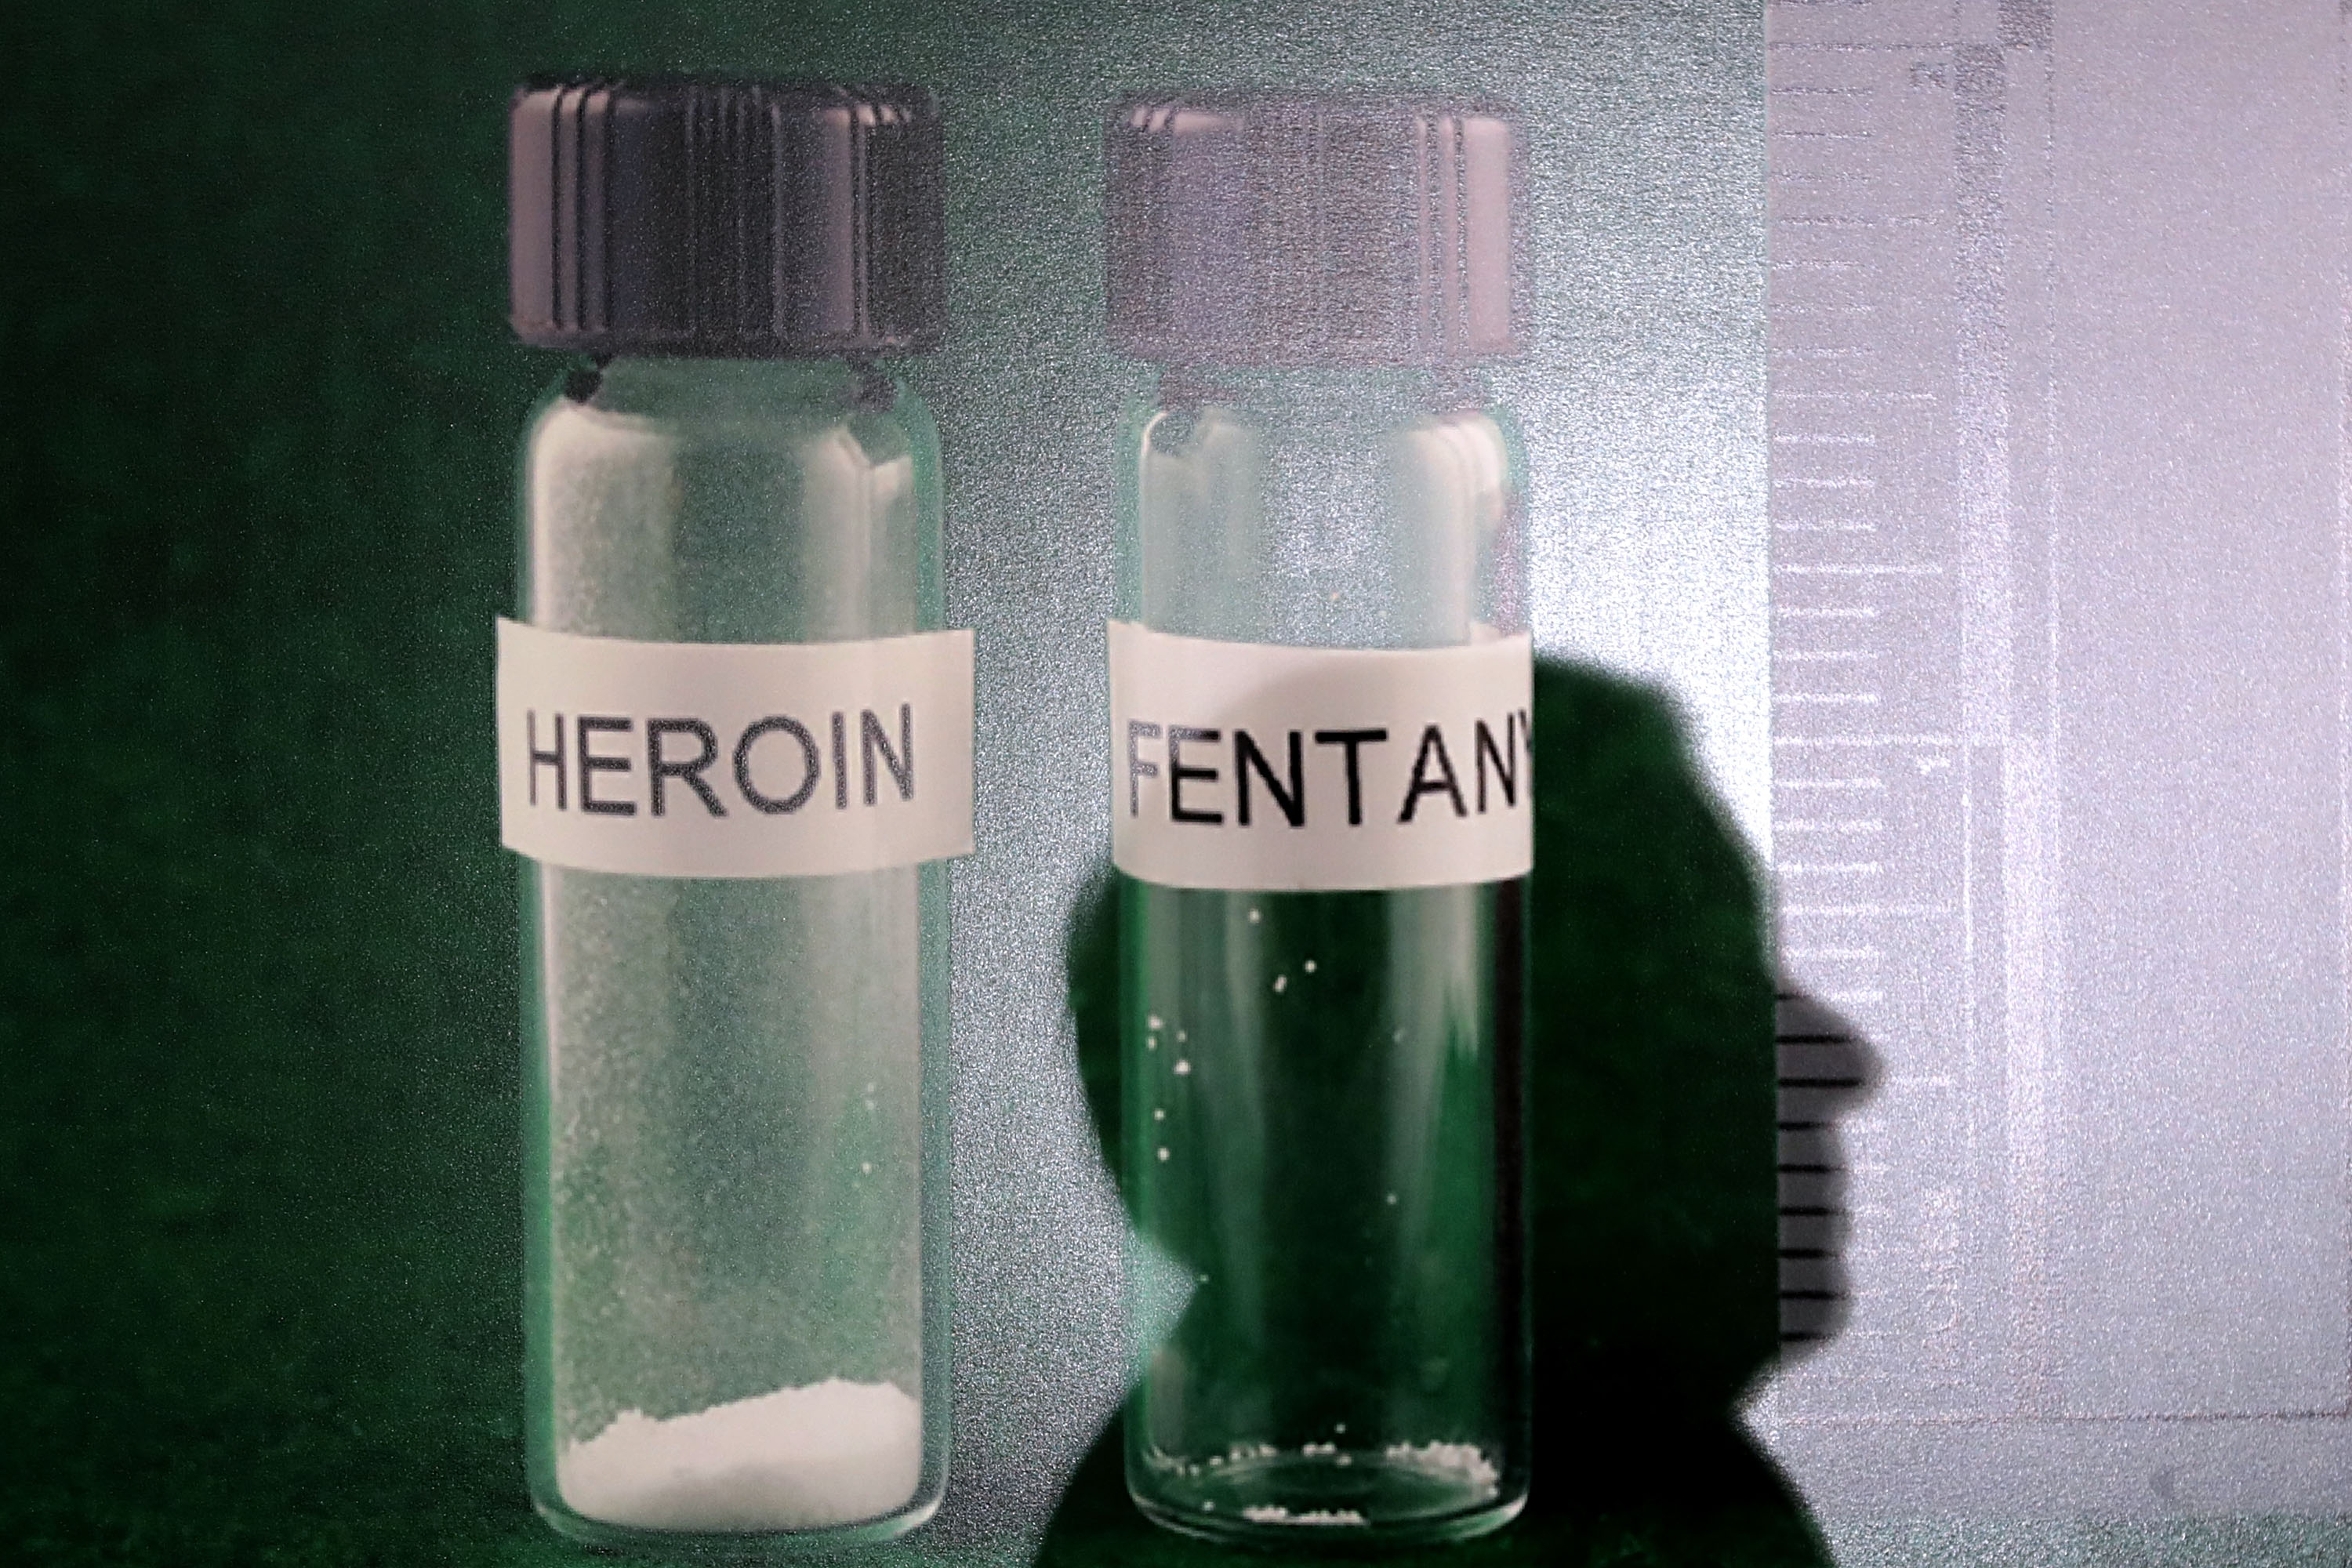

In [4]:
display.Image("https://content.fortune.com/wp-content/uploads/2018/04/fentanyl-overdose-drug.jpg", height = 500, width = 500)

*Image source: CHIP SOMODEVILLA—GETTY IMAGES*

**Figure: Overdose Deaths Per Capita Per Year of Criminalised Versus Decriminalised European Countries**

This plot more clearly shows how countries that criminalise drugs by 2018 perform versus those that have decriminalised drugs by 2018 in terms of addict and user health by overdose deaths.
Decriminalised countries and criminalised countries seem to show a large degree of overlap with a portion of criminalised countries showing more overdose deaths per year. 

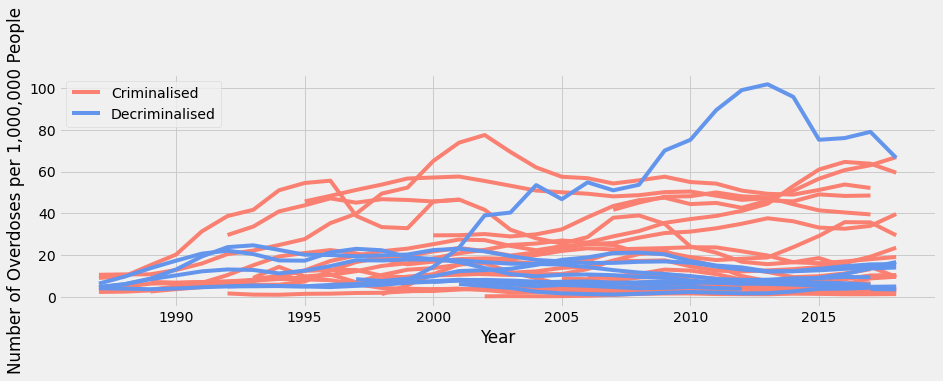

In [5]:
Image(filename='overdosedeathscrimvsdecrimlineplot.png')

The graph above shows a clustering of criminalised and deriminalised countries at the lower ranges of overdose deaths which are hard to discern differences from visually. However the higher the number of overdoses becomes, the more dominated the graph becomes by criminalised countries. This could suggest that more criminalised countries see a higher number of overdose deaths than decriminalised countries, although this cannot be asserted until it is fully explored in the analysis. There is one decriminalised country with an especially high number of overdoses which can be seen starting to spike around 2000. When considering the previously mentioned case study, it is unsurprising that this country is Estonia.

**Figure: Mean Overdose Deaths Per Capita Between 2014-2018 for European Countries,Criminalised versus Decriminalised**

The 2014-2018 window was chosen as most countries had a datapoint within that criteria. Furthermore, when we were testing different 'windowing' settings to smooth noise in the overall graph, but not lose trends, we found that the four year point was effective in doing so. We also felt like four years was a good compromise of being not too far from our 'up to date' 2018 laws.

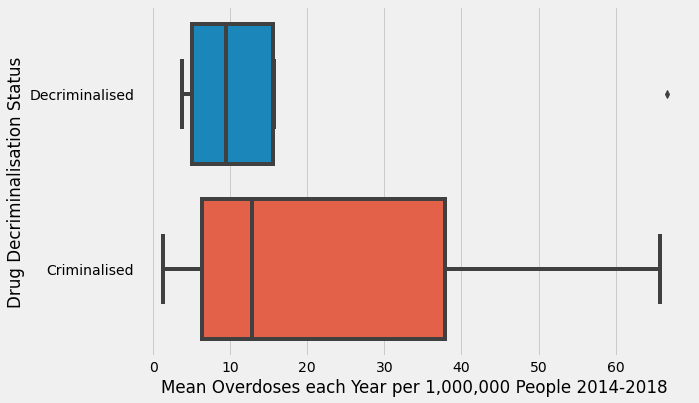

In [6]:
Image(filename='overdosedeathscrimvsdecrimboxplot.png')

As seen in the box plot, the median number of overdoses for the decriminalised and criminalised data was fairly close, as indicated by the central line. The number of overdose deaths for the criminalised countries has a much larger interquartile range, indicated by the length of the box, as well as significantly greater outliers, as indicated by the error bars. The larger range and outliers of the criminalised data indicate that the overdose rate for criminalised countries has a significantly higher variance than that of the decriminalised countries.

Analysis:

In [7]:
# Creating lists of names of criminalised and decriminalised countries from the master categorical table by getting the values only, from the index. Variant/non variant for overdose data where United Kingdom is only reported as UK (England & Wales). This is useful to call on later and select for data to analyse in this question.
decriminalised_countries = europe_criminalisation_status_with_colour[europe_criminalisation_status_with_colour['Decriminalised'] == 'Yes'].index.values
criminalised_countries = europe_criminalisation_status_with_colour[europe_criminalisation_status_with_colour['Decriminalised'] == 'No'].index.values
criminalised_countries_variant = np.delete(criminalised_countries, 20)
criminalised_countries = np.delete(criminalised_countries, 21)


In [8]:
# Loading in overdose deaths per capita with Date as the index.
overdosedeaths_per_capita = pd.read_csv('overdosedeaths_per_capita.csv').set_index('Date')
# Selecting only the dates between 2014-2018. This was done as when we visualised, 4 timepoint smoothing/'windowing' seemed to keep most major trends while reducing noise in the graph. We also felt that 4 years was a short enough period that the 2018 laws and categorical data we found would still be highly relevant.
overdosedeaths_2014_to_2018 = overdosedeaths_per_capita.loc[(2015, 2016, 2017, 2018), :].copy()
# I investigated using nanmean() but it turns out that mean() does the job just fine, and ignores the Nans. We calculated the mean to reduce noise.
Mean_overdosedeaths_2014_to_2018 = pd.DataFrame()
Mean_overdosedeaths_2014_to_2018['Mean Overdoses per 1,000,000 People(2014-2018)'] = overdosedeaths_2014_to_2018.mean()

# We create arrays, dropping the NAN values, and sorting them, of crimanlised and decriminalised countries separately.
crim_mn_2014_2018_od = Mean_overdosedeaths_2014_to_2018.loc[criminalised_countries_variant].dropna().sort_values('Mean Overdoses per 1,000,000 People(2014-2018)', ascending = False)
decrim_mn_2014_2018_od = Mean_overdosedeaths_2014_to_2018.loc[decriminalised_countries].dropna().sort_values('Mean Overdoses per 1,000,000 People(2014-2018)', ascending = False)


# Permutation - to see if the distribution of data seen between criminalised and decriminalised country was likely or unlikely due to chance alone.

observed_difference = np.mean(crim_mn_2014_2018_od['Mean Overdoses per 1,000,000 People(2014-2018)']) - np.mean(decrim_mn_2014_2018_od['Mean Overdoses per 1,000,000 People(2014-2018)'])

pooled = np.append(decrim_mn_2014_2018_od, crim_mn_2014_2018_od)
n_iters = 100000
fake_differences = np.zeros(n_iters)
num_crim = len(crim_mn_2014_2018_od)
for i in np.arange(n_iters):
    shuffled = np.random.permutation(pooled)
    # Tidied this up
    fake_differences[i] = np.mean(shuffled[:num_crim]) - np.mean(shuffled[num_crim:])

permutation_p = np.count_nonzero( fake_differences >= observed_difference)/ n_iters


overdose_perm = ('The countries that still criminalised drug use in 2018 had an average of', np.round(observed_difference, 2), 'more drug overdose deaths per 1,000,000 people versus decriminalised countries between 2014 and 2018. The likelihood that this distribution could have occurred due to chance alone in our analysis was', permutation_p,'.')

print('The countries that still criminalised drug use in 2018 had an average of', np.round(observed_difference, 2), 'more drug overdose deaths per 1,000,000 people versus decriminalised countries between 2014 and 2018. The likelihood that this distribution could have occurred due to chance alone in our analysis was', permutation_p,'.')

The countries that still criminalised drug use in 2018 had an average of 7.29 more drug overdose deaths per 1,000,000 people versus decriminalised countries between 2014 and 2018. The likelihood that this distribution could have occurred due to chance alone in our analysis was 0.19591 .


#### Use offences per capita


*The Master plot for tracking individual countries, their status and trends.* 

**Figure: Use Offences Per Capita Per Year of Criminalised and Decriminalised European Countries 2008-2018**
Decriminalised countries and criminalised countries seem to occupy the same spaces and trends. There does not seem to be much different between them for use offences per capita per year.

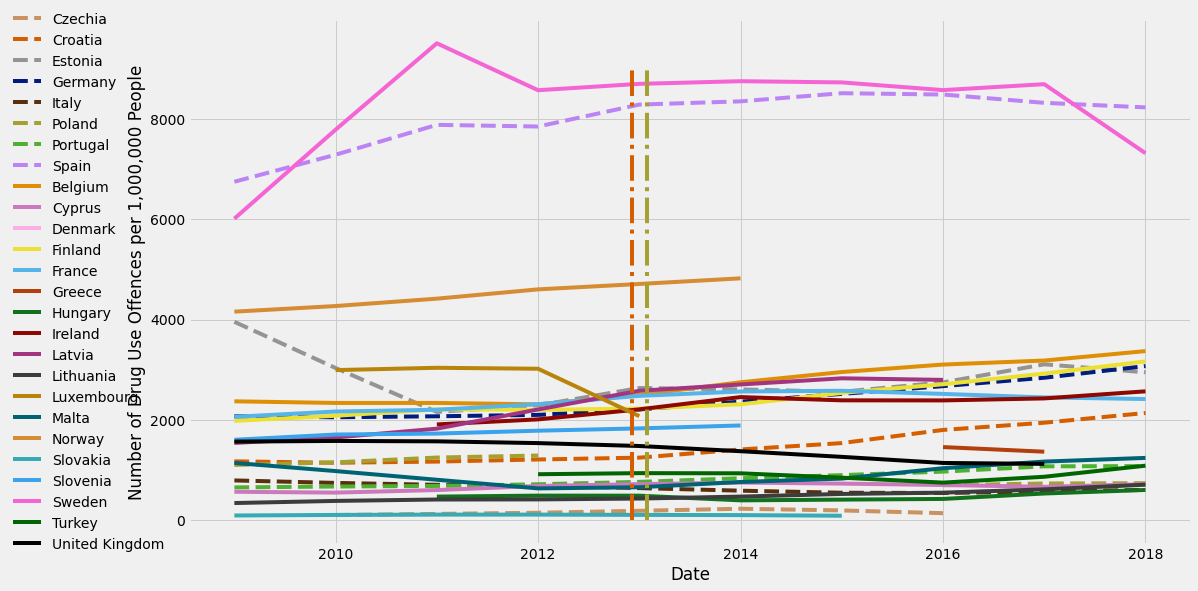

In [9]:
Image(filename='useoffencesallcountrieslineplot.png')

**Figure: Mean Use Offence Per Capita between 2014-2018 of Criminalised Versus Decriminalised European Countries**

This plot more clearly shows how countries that criminalise drugs by 2018 perform versus those that have decriminalised drugs by 2018 for administrative and enforcement burden, as well as persecution of users and addicts. Visually, there does not appear to be much of a difference to distinguish, which is why a permutation is required for further analysis. We can see one criminalised (Sweden) and one decriminalised (Spain) country each with a significantly higher number of use offences than the other countries. Spain's exceedingly high number of offences is a complex issue, affected by their Geography and its appeal to smugglers, this issue will be explored in more depth later.

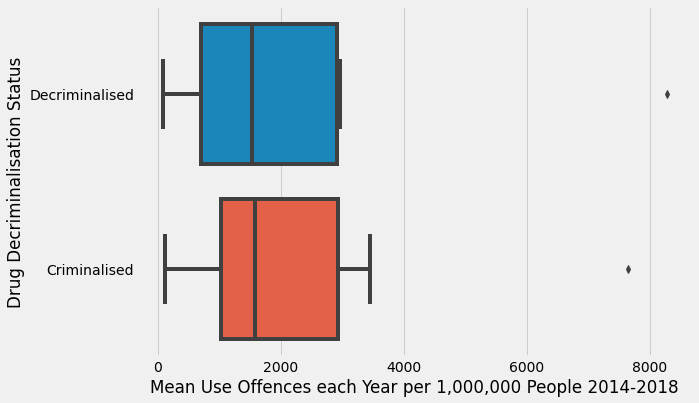

In [10]:
Image(filename='useoffencescrimvsdecrimboxplot.png')

As seen from the box plot, the decriminalised countries have a larger interquartile range, whereas the criminalised countries have a larger distance between their outliers. This indicates that the decriminalised countries have a slightly higher variance when not considering outliers. However as the following permutation uses the mean, which takes outliers into account, then the criminalised coutnries' larger outlier range will be affect the resulting average.

Analysis:

In [11]:
# Loading in use offences per capita with Date as the index.
n_UseOffences_per_capita = pd.read_csv(
    'n_UseOffences_per_capita.csv').set_index('Date')
# Selecting only the dates between 2014-2018. This was done as when we visualised, 4 timepoint smoothing/'windowing' seemed to keep most major trends while reducing noise in the graph. We also felt that 4 years was a short enough period that the 2018 laws and categorical data we found would still be highly relevant.
use_offences_per_capita_2014_to_2018 = n_UseOffences_per_capita.loc[(
    2015, 2016, 2017, 2018), :].copy()
Mean_use_offences_per_capita_2014_to_2018 = pd.DataFrame()
Mean_use_offences_per_capita_2014_to_2018[
    'Mean Use Offences per 1,000,000 People(2014-2018)'] = use_offences_per_capita_2014_to_2018.mean(
    )
# Countries without relevant data (having been judged by having 0/4 timepoints within the 4 year period) are removed from selection for analysis. For the criminalised countries for this metric, it is Austria, Bulgaria and Norway. For the decriminalised it is the Netherlands.
criminalised_countries_useoff = np.delete(criminalised_countries, (0, 2, 15))
decriminalised_countries_useoff = np.delete(decriminalised_countries, (5))

# We create arrays, dropping the NAN values, and sorting them, of crimanlised and decriminalised countries separately.
crim_mn_2014_2018_useoff = Mean_use_offences_per_capita_2014_to_2018.loc[
    criminalised_countries_useoff].dropna().sort_values(
        'Mean Use Offences per 1,000,000 People(2014-2018)', ascending=False)
decrim_mn_2014_2018_useoff = Mean_use_offences_per_capita_2014_to_2018.loc[
    decriminalised_countries_useoff].dropna().sort_values(
        'Mean Use Offences per 1,000,000 People(2014-2018)', ascending=False)

# Permutation
observed_difference = np.mean(crim_mn_2014_2018_useoff[
    'Mean Use Offences per 1,000,000 People(2014-2018)']) - np.mean(
        decrim_mn_2014_2018_useoff[
            'Mean Use Offences per 1,000,000 People(2014-2018)'])

pooled = np.append(decrim_mn_2014_2018_useoff, crim_mn_2014_2018_useoff)
n_iters = 100000
num_crim = len(crim_mn_2014_2018_useoff)
fake_differences = np.zeros(n_iters)
for i in np.arange(n_iters):
    shuffled = np.random.permutation(pooled)
    fake_differences[i] = np.mean(shuffled[:num_crim]) - np.mean(
        shuffled[num_crim:])

permutation_p = np.count_nonzero(
    fake_differences >= observed_difference) / n_iters
use_off_perm = (
    'The countries that still criminalised drug use in 2018 had an average of',
    np.abs(np.round(observed_difference, 2)),
    'less drug use offences per 1,000,000 people versus decriminalised countries between 2014 and 2018. The likelihood that this distribution could have occurred due to chance alone in our analysis was',
    permutation_p, '.')

print(
    'The countries that still criminalised drug use in 2018 had an average of',
    np.abs(np.round(observed_difference, 2)),
    'less drug use offences per 1,000,000 people versus decriminalised countries between 2014 and 2018. The likelihood that this distribution could have occurred due to chance alone in our analysis was',
    permutation_p, '.')

The countries that still criminalised drug use in 2018 had an average of 230.78 less drug use offences per 1,000,000 people versus decriminalised countries between 2014 and 2018. The likelihood that this distribution could have occurred due to chance alone in our analysis was 0.60613 .


#### Number of offenders per capita

**Figure: Number of Offenders Per Capita Per Year of Criminalised and Decriminalised European Countries 2008-2018**
Decriminalised countries and criminalised countries seem to occupy the same spaces and trends. There does not seem to be much different between them for use offences per capita per year.

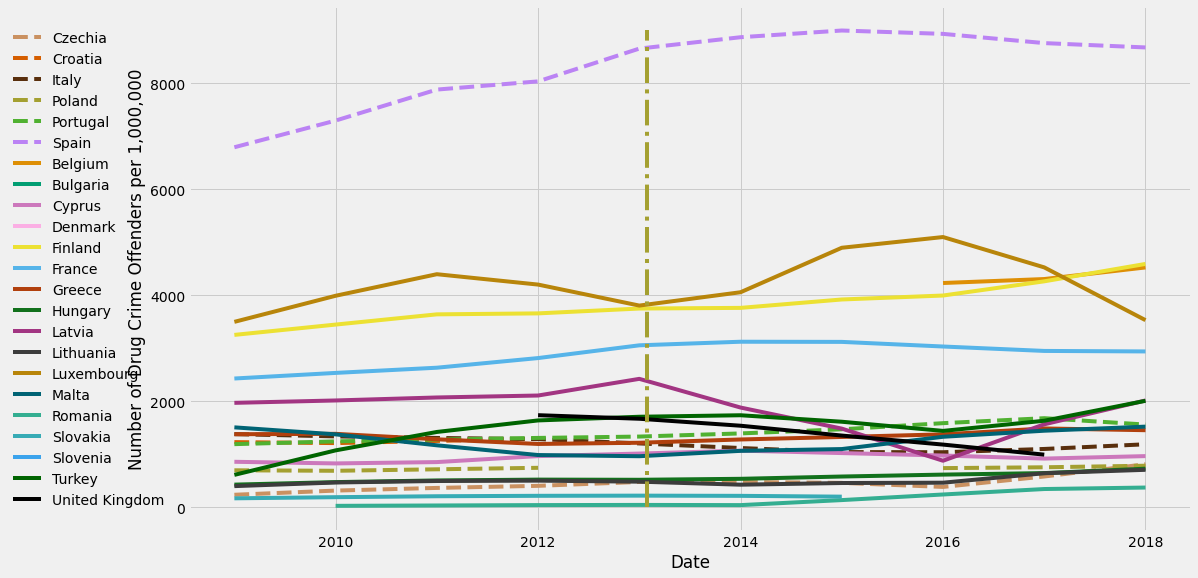

In [12]:
Image(filename='numoffendersallcountrieslineplot.png')

As shown in the figure above, the countries with lower values of number of offenders are hard to distinguish visually. However as the numbers of offenders rises, the graph becomes dominated by criminalised countries (particularly between 2000 and 5000 offenders per capita). This could suggest that criminalised countries see a higher number of drug crime offenders, although this is a purely visual conclusion to be tested in the following analysis. Similar to the data for use offences, the chart is topped by Spain, a decriminalised country. Spain's number of drug crime offenders exceeds double that of the country with the second highest amount (Luxembourg). As briefly mentioned earlier, Spain's excessive drug crime statistics are driven by number of key factors, which are outlined in the case study below.

>> #### Case Study: Spain's Number of Offenders


>> Shown with the purple dashed line in the above graph.

>> 'Although fishing-boat transportation has declined, container and merchant vessel traffic is on the rise, the latter being almost impossible to tackle.'
>> Says a Galician (Spanish) Police Commissioner.

>> The article highlights a growing narco-trafficking - specifically cocaine - stronghold in Spain, but also shows a police force making strong attempts to and that is entirely willing to conduct large scale anti-trafficking operations to fight against the growing threat. Geographic location in Europe, good road infrastructure and lots of sea and port access makes Spain attractive to traffickers according to the article. This could largely explain increased offender numbers. It may also be possible that Spain's high use offence rate could be symptomatic of this 'drug war', or simply another by-product of a hardline stance against drug use despite decriminalisation for the addict.

>> Therefore it could be reasonable to assume that decriminalisation of drugs doesn't necessarily affect or detract from the demand and supply of drugs if only this case study is taken into account. 



Source: https://english.elpais.com/spanish_news/2021-02-03/spain-and-its-narcotraffickers.html

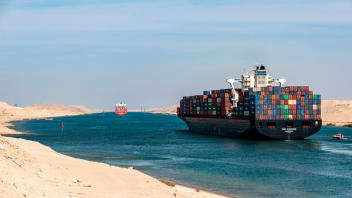

In [13]:
display.Image("https://mediacloud.theweek.com/image/private/s--FtSLAeQE--/f_auto,t_primary-image-continuous-scroll-desktop@1/v1616762104/gettyimages-1183013061.jpg", height = 500, width = 500)

*Image source: Khaled Desouki/AFP/Getty Images*

**Figure: Mean Number of Offenders Per Capita Between 2014-2018 of Criminalised Versus Decriminalised European Countries**

This plot more clearly shows how countries that criminalise drugs by 2018 perform versus those that have decriminalised drugs by 2018 for administrative and enforcement burden, as well as persecution of users and addicts. Number of offenders also factors in supply offenders, higher numbers possibly denoting an increased supply problem or more effective enforcement. There seems to be quite considerable overlap for most aspects of the box plot. There does not seem to be much difference between them.

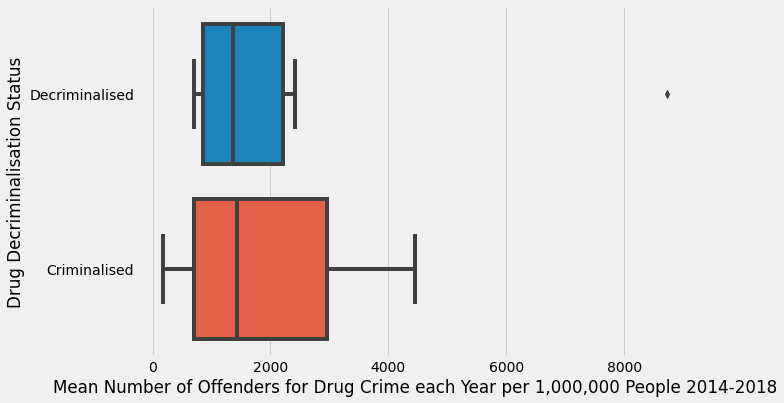

In [14]:
Image(filename='numoffenderscrimvsdecrimboxplot.png')


The boxplot shows that the criminalised countries have a significantly larger interquartile range, and maximum range of outliers for the number of drug crime offenders per capita. This suggests that the data for the criminalised countries has a larger variance. It is possible that decriminalisation had a role to play in this reduced variance and interquartile range, a possibility that was tested in the following analysis.

Analysis:

In [15]:
# Loading in use offences per capita with Date as the index.
offenders_per_capita = pd.read_csv('offenders_per_capita.csv').set_index('Date')
# Selecting only the dates between 2014-2018. This was done as when we visualised, 4 timepoint smoothing/'windowing' seemed to keep most major trends while reducing noise in the graph. We also felt that 4 years was a short enough period that the 2018 laws and categorical data we found would still be highly relevant.
offenders_per_capita_2014_to_2018 = offenders_per_capita.loc[(2015, 2016, 2017, 2018), :].copy()

Mean_offenders_per_capita_2014_to_2018 = pd.DataFrame()
Mean_offenders_per_capita_2014_to_2018['Mean Drug-related Offenders per 1,000,000 People(2014-2018)'] = offenders_per_capita_2014_to_2018.mean()
# Removing the countries that don't have atleast 1/4 data entries between 2014-2018 for the metric. For criminalised countries with this metric it was Austria, Ireland, Norway and Sweden. For decriminalised it was Estonia, Germany and the Netherlands.
criminalised_countries_off = np.delete(criminalised_countries, (0, 9, 14, 18))
decriminalised_countries_off =  np.delete(decriminalised_countries, (2,3,5))
# We create arrays, dropping the NAN values, and sorting them, of crimanlised and decriminalised countries separately.
crim_mn_2014_2018_off = Mean_offenders_per_capita_2014_to_2018.loc[criminalised_countries_off].dropna().sort_values('Mean Drug-related Offenders per 1,000,000 People(2014-2018)', ascending = False)
decrim_mn_2014_2018_off = Mean_offenders_per_capita_2014_to_2018.loc[decriminalised_countries_off].dropna().sort_values('Mean Drug-related Offenders per 1,000,000 People(2014-2018)', ascending = False)




# Permutation - to see if the distribution of data seen between criminalised and decriminalised country was likely or unlikely due to chance alone.

observed_difference = np.mean(crim_mn_2014_2018_off['Mean Drug-related Offenders per 1,000,000 People(2014-2018)']) - np.mean(decrim_mn_2014_2018_off['Mean Drug-related Offenders per 1,000,000 People(2014-2018)'])

pooled = np.append(decrim_mn_2014_2018_off, crim_mn_2014_2018_off)
n_iters = 100000
num_crim = len(crim_mn_2014_2018_off)
fake_differences = np.zeros(n_iters)
for i in np.arange(n_iters):
    shuffled = np.random.permutation(pooled)
    fake_differences[i] = np.mean(shuffled[:num_crim]) - np.mean(shuffled[num_crim:])


permutation_p = np.count_nonzero( fake_differences >= observed_difference)/ n_iters

n_off_perm = ('The countries that still criminalised drug use in 2018 had an average of', np.abs(np.round(observed_difference, 2)), 'less Drug-related Offenders per 1,000,000 people versus decriminalised countries between 2014 and 2018. The likelihood that this distribution could have occurred due to chance alone in our analysis was', permutation_p,'.')

print('The countries that still criminalised drug use in 2018 had an average of', np.abs(np.round(observed_difference, 2)), 'less Drug-related Offenders per 1,000,000 people versus decriminalised countries between 2014 and 2018. The likelihood that this distribution could have occurred due to chance alone in our analysis was', permutation_p,'.')

The countries that still criminalised drug use in 2018 had an average of 595.64 less Drug-related Offenders per 1,000,000 people versus decriminalised countries between 2014 and 2018. The likelihood that this distribution could have occurred due to chance alone in our analysis was 0.73961 .


#### 1.1 Results:

Permutations were used to test whether countries that have decriminalised drugs experience lower rates of overdose, drug use offences, and numbers of drug crime offenders, compared to non-decriminalised countries.

**Overdoses per capita**

The countries were grouped into a decriminalised and non-decriminalised group, then a mean was calculated of the overdose rate per capita from 2015 to 2018 (to account for NaNs). The average of the mean overdose rates for the decriminalised countries was subtracted from the non-decriminalised countries to obtain the actual difference in overdose deaths. Following this the mean values of overdose rates were pooled, and a permutation was performed to find the probability that the difference occurred due to chance.

The countries that had decriminalised drugs by 2018 saw an average of **7.29 less overdose deaths per million people than non-decriminalised countries**, the permutation tests revealed that the likelihood this difference could have occurred due to chance was **0.19655**. This means there is roughly a **20% chance that the difference in 2015-2018 overdoses was due to chance**, so it cannot be confidently stated that the difference in overdose deaths was due to the drug decriminalisation, but that it is still likely.


**Use offences per capita**

The countries were again grouped into decriminalised and non-decriminalised groups, and an average for drug use offences from 2015 to 2018 was calculated for each country. The mean difference between decriminalised and non-decriminalised countries was calculated, and then the mean values of drug use offences were pooled for a permutation.

The countries that had decriminalised drugs by 2018 saw an average of **230.78 less drug use offences per million people compared to countries who still criminalised drugs in 2018**. However, the permutation revealed that the likelihood this difference could have been observed by chance was **0.607**. This means there was a **60% chance the mean difference could have occurred at random**, and therefore decriminalisation did not have an effect on the number of drug use offences in 2018.


**Number of offenders per capita**

The countries were pooled into decriminalised and non-decriminalised groups, and an average for drug crime offenders from 2015 to 2018 was calculated for each country. The mean difference in drug crime offenders between decriminalised and non-decriminalised countries was calculated, and then the mean numbers of offenders were pooled for a permutation.

The countries that had decriminalised drugs by 2018 saw an average of **595.64 more drug crime offenders per million people compared to non-decriminalised countries**. However, the permutation revealed that the likelihood this difference occurred due to chance was **0.739**. This means that it is **highly likely that the increase in drug crime offenders in decriminalised countries was due to chance**, and that decriminalisation can not be blamed for the increased number of offenders.


### Question 1.2 - Does it work when it is introduced?

We ask this question to determine whether drug decriminalisation laws were effective at reducing the problems associated with drug use at the time the law was passed, compared with countries that didn't decriminalise during the same time period.

To analyse this, we calculate the changes in the metric per capita between the four years leading up to decriminalisation and the four years after decriminalisation, and calculate the changes for the metric in the same time period for the non-decriminalised countries. We then use these changes in a permutation to determine the significance of the difference.

We also perform a regression on the metrics of the decriminalised countries from before and after decriminalisation, comparing the slopes from before and after to determine whether a significant change followed decriminalisation.

In [16]:
# Function for counting change between four time points from a specified date (for one date and country)
# Designed for dataframes with date as rows and countries as columns, such as overdosedeaths, useoffences, and numoffenders.
# Takes dataframe, decriminalisation date, and country as input.

def count_Change(df,date,country):
    # Subtracts the value for 4 years after the decriminalisation date from the value for 4 years before, then does the same with 3 years, 2 years, and 1 year. This gives 4 change values from the decriminalisation date.
    changes = [df.loc[date-4,country]-df.loc[date+4,country],df.loc[date-3,country]-df.loc[date+3,country],df.loc[date-2,country]-df.loc[date+2,country],df.loc[date-1,country]-df.loc[date+1,country]]
    changes = np.array(changes)
    return changes

# Uses function above to calculate change for multiple dates and countries.
# Takes dataframe, array of dates, and array of countries as input.
def count_change_multiple(df,dates,country):
    dates = np.array(dates)
    array = []
    # Iterates through dates and countries, returning 4 change values for each date/country combination.
    for date in range(len(dates)):
        for count in range(len(country)):
            changes = count_Change(df,dates[date],country[count])
            # Appends change values on to array with each iteration.
            array = np.append(array,changes)
    return array

#### Overdoses per capita

Analysis:

The countries that decriminalised drugs saw an average decrease of 4.23 drug overdose deaths per 1,000,000 people in the four years following decriminalisation compared to criminalised countries during the same time periods. The likelihood that this distribution could have occurred due to chance alone in our analysis was 0.0763 .


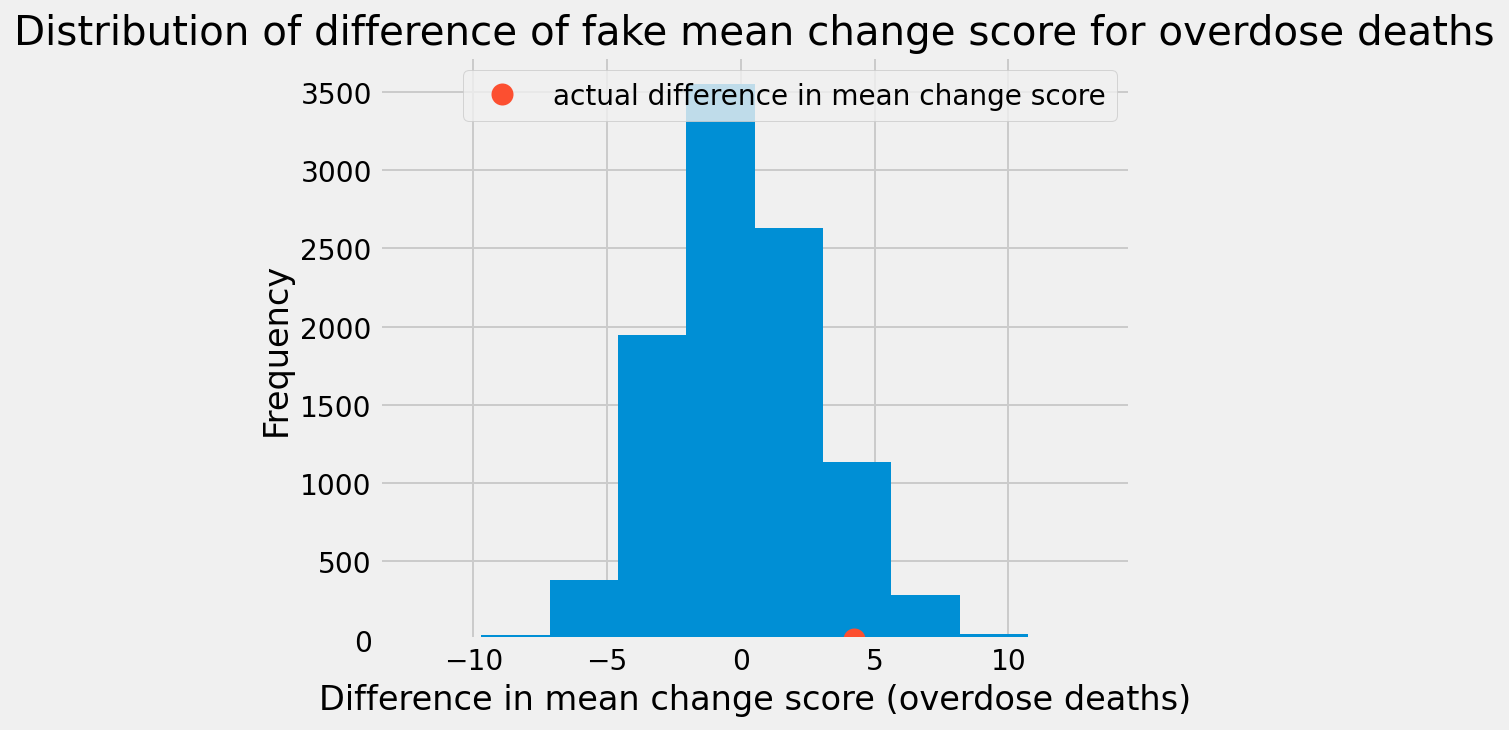

In [17]:
# Change permutation for decriminalised countries, could be improved once function at top of page is finished.
overdose_for_change = overdosedeaths_per_capita.copy()
#overdose_for_change = overdose_for_change.set_axis(overdose_for_change['Date'],axis =0)
# Drop decriminalised countries that don't have data from before their law.
overdose_for_change = overdose_for_change.drop(['Czechia','Netherlands','Spain'],axis=1)

## Decriminalised countries (with data before law change)
changes_germany = count_Change(overdose_for_change, 1992,'Germany')

changes_estonia = count_Change(overdose_for_change, 2002,'Estonia')

changes_croatia = count_Change(overdose_for_change, 2013,'Croatia')

changes_italy = count_Change(overdose_for_change, 1990,'Italy')

changes_poland = count_Change(overdose_for_change, 2013,'Poland')

# Leaving Portugal out because data only goes back to 2 years from law rather than 4.

# Calculate changes for non-decriminalised countries, in the same time frames used for decriminalised countries.

# Use function to calculate change values for non-decriminalised countries for the decriminalisation dates.
crim_changes = count_change_multiple(overdose_for_change,[1992,2002,2013,1990], ['Belgium', 'Greece','Austria','Denmark','France','Norway','UK (England & Wales)','Cyprus', 'Finland','Hungary','Ireland','Latvia','Lithuania', 'Luxembourg','Malta','Slovakia','Slovenia','Sweden','Turkey'])

# Remove NaNs
crim_changes = crim_changes[np.argwhere(np.isnan(crim_changes)==False)]

decrim_changes = [changes_germany, changes_estonia, changes_croatia, changes_italy, changes_poland]

pooled_changes = np.append(decrim_changes,crim_changes)
num_crim = len(crim_changes)

# Calculate the observed difference between criminalised and decriminalised groups.
actual_diff = np.mean(crim_changes) - np.mean(decrim_changes)
# Permutation.
n_iters = 10000
fake_differences = np.zeros(n_iters)
for i in np.arange(n_iters):
    shuffled = np.random.permutation(pooled_changes)
    fake_differences[i] = np.mean(shuffled[:num_crim]) - np.mean(shuffled[num_crim:])

prop = np.count_nonzero(fake_differences>=np.abs(actual_diff))/len(fake_differences)

plt.figure(figsize = (6, 5))
plt.hist(fake_differences)
plt.title('Distribution of difference of fake mean change score for overdose deaths')
plt.plot(actual_diff, 1, 'o', markersize = 10, label = 'actual difference in mean change score')
plt.xlabel('Difference in mean change score (overdose deaths)')
plt.ylabel('Frequency')
plt.legend();

print('The countries that decriminalised drugs saw an average decrease of', np.round(actual_diff, 2), 'drug overdose deaths per 1,000,000 people in the four years following decriminalisation compared to criminalised countries during the same time periods. The likelihood that this distribution could have occurred due to chance alone in our analysis was', prop,'.')



#### Use offences per capita

Analysis:

The countries that decriminalised drugs saw an average decrease of 65.7 drug use offences deaths per 1,000,000 people in the four years following decriminalisation compared to criminalised countries during the same time periods. The likelihood that this distribution could have occurred due to chance alone in our analysis was 0.482 .


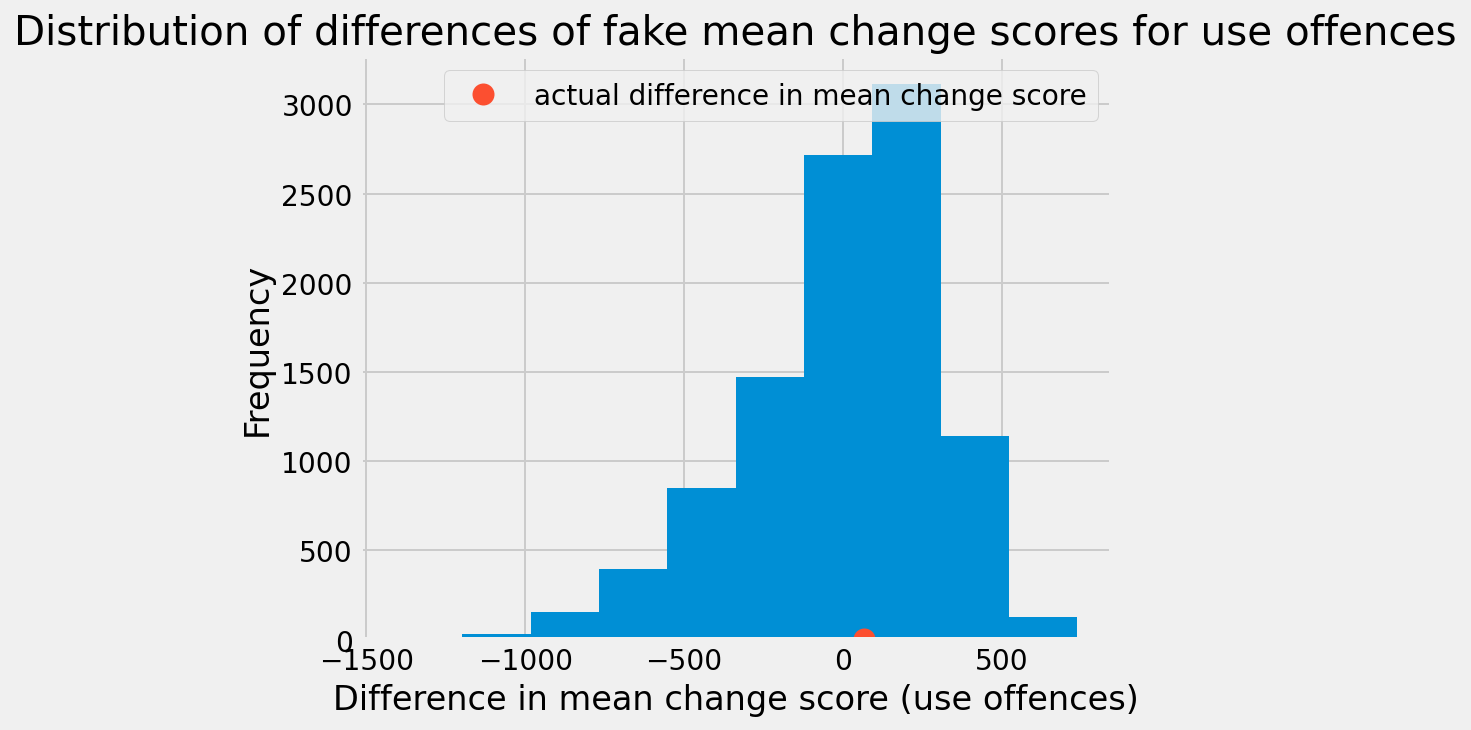

In [18]:
# Change permutation for use offences.
n_UseOffences_Europe = pd.read_csv('n_UseOffences_per_capita.csv')

useOffences_for_change = n_UseOffences_Europe.copy()
useOffences_for_change = useOffences_for_change.set_axis(useOffences_for_change['Date'],axis=0)
useOffences_for_change = useOffences_for_change.drop('Date',axis=1)

# Decriminalised changes
# Can calculate decriminalised in one go as its 2 countries with the same date.
decrim_changes_use = count_change_multiple(useOffences_for_change,[2013],['Poland','Croatia'])
# Remove NaNs
decrim_changes_use = decrim_changes_use[np.argwhere(np.isnan(decrim_changes_use)==False)]

# Criminalised changes
crim_changes_use = count_change_multiple(useOffences_for_change,[2013],['Belgium','United Kingdom', 'France','Norway','Cyprus','Denmark','Greece','Finland','Hungary','Ireland','Latvia','Lithuania','Luxembourg','Malta','Slovakia','Slovenia','Sweden','Turkey'])
crim_changes_use = crim_changes_use[np.argwhere(np.isnan(crim_changes_use)==False)]



# Permutation
pooled_changes_use = np.append(decrim_changes_use,crim_changes_use)
num_crim_use = len(crim_changes_use)
# Actual difference comes out as 65.7, meaning decriminalised countries have less use offences than criminalised ones.
actual_diff_use = np.mean(crim_changes_use) - np.mean(decrim_changes_use)
# Permutation
n_iters = 10000
fake_differences_use = np.zeros(n_iters)
for i in np.arange(n_iters):
    shuffled_use = np.random.permutation(pooled_changes_use)
    fake_differences_use[i] = np.mean(shuffled_use[:num_crim_use]) - np.mean(shuffled_use[num_crim_use:])

# Calculate proportion of times fake differences exceed actual difference.
prop = np.count_nonzero(fake_differences_use>=np.abs(actual_diff_use))/10000

# Visualise differences
plt.figure(figsize = (6, 5))
plt.hist(fake_differences_use)
plt.title('Distribution of differences of fake mean change scores for use offences')
plt.plot(actual_diff_use, 1, 'o', markersize = 10, label = 'actual difference in mean change score')
plt.xlabel('Difference in mean change score (use offences)')
plt.ylabel('Frequency')
plt.legend();

print('The countries that decriminalised drugs saw an average decrease of', np.round(actual_diff_use, 2), 'drug use offences deaths per 1,000,000 people in the four years following decriminalisation compared to criminalised countries during the same time periods. The likelihood that this distribution could have occurred due to chance alone in our analysis was', prop,'.')


#### Number of offenders per capita

Analysis:

The countries that decriminalised drugs saw an average decrease of 397.0 drug crime offenders per 1,000,000 people in the four years following decriminalisation compared to criminalised countries during the same time periods. The likelihood that this distribution could have occurred due to chance alone in our analysis was 0.0559 .


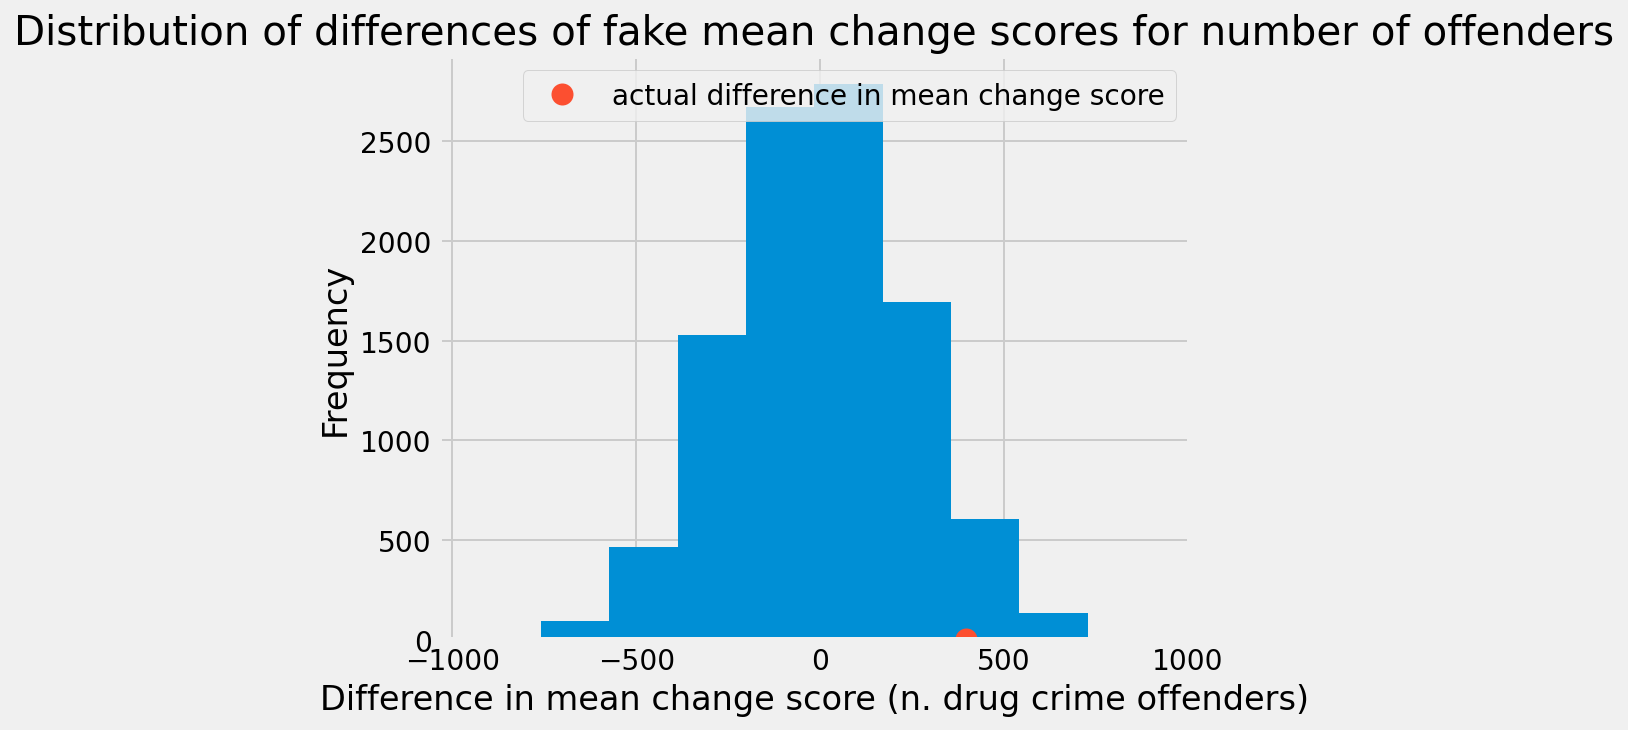

In [19]:
# Change permutation for number of offenders.
offenders_for_change = pd.read_csv('offenders_per_capita.csv')
offenders_for_change = offenders_for_change.set_axis(offenders_for_change['Date'],axis=0)
offenders_for_change = offenders_for_change.drop(['Date'],axis=1)

# Decriminalised countries
# Can only do poland and croatia because data starts in 2007.
decrim_change_offenders = count_change_multiple(offenders_for_change,[2013],['Poland','Croatia'])
decrim_change_offenders = decrim_change_offenders[np.argwhere(np.isnan(decrim_change_offenders)==False)]

# Criminalised countries (Norway, Ireland, & Turkey removed for overwhelming amount of NaNs)
crim_change_offenders = count_change_multiple(offenders_for_change,[2013],['Belgium','United Kingdom', 'France','Cyprus','Denmark','Greece','Finland','Hungary','Latvia','Lithuania','Luxembourg','Malta','Slovakia','Slovenia','Turkey'])
crim_change_offenders = crim_change_offenders[np.argwhere(np.isnan(crim_change_offenders)==False)]

pooled_changes_offenders = np.append(decrim_change_offenders,crim_change_offenders)
num_crim_offenders = len(crim_change_offenders)
# Calculate actual difference between decriminalised and criminalised countries.
actual_diff_offenders = np.mean(crim_change_offenders) - np.mean(decrim_change_offenders)
# Permutation
n_iters = 10000
fake_differences_offenders = np.zeros(n_iters)
for i in np.arange(n_iters):
    shuffled_offenders = np.random.permutation(pooled_changes_offenders)
    fake_differences_offenders[i] = np.mean(shuffled_offenders[:num_crim_offenders]) - np.mean(shuffled_offenders[num_crim_offenders:])

# Calculate proportion of times the fake differences exceed the observed difference
prop = np.count_nonzero(fake_differences_offenders>=np.abs(actual_diff_offenders))/n_iters

# Visualise fake and real differences
plt.figure(figsize = (6, 5))
plt.hist(fake_differences_offenders)
plt.title('Distribution of differences of fake mean change scores for number of offenders')
plt.plot(actual_diff_offenders, 1, 'o', markersize = 10, label = 'actual difference in mean change score')
plt.xlabel('Difference in mean change score (n. drug crime offenders)')
plt.ylabel('Frequency')
plt.legend();

print('The countries that decriminalised drugs saw an average decrease of', np.round(actual_diff_offenders, 2), 'drug crime offenders per 1,000,000 people in the four years following decriminalisation compared to criminalised countries during the same time periods. The likelihood that this distribution could have occurred due to chance alone in our analysis was', prop,'.')

#### 1.2 Results:

Permutations were used to test whether drug-decriminalisation influenced the markers of problem drug use at the time the law was passed. The permutations were done by taking the dates of decriminalisation for each decriminalised country and subtracting the values from the four years following the decriminalisation from the four years preceding, with the fourth following year being subtracted from the fourth preceding, the third following from the third preceding, and so on.

This produced four change values per decriminalised country for the marker in question (overdoses/use-offences/offenders). Change values for all non-decriminalised countries were then calculated for the same time periods, before subtracting the average change for the decriminalised countries from the non-decriminalised countries to obtain an average observed difference. Next the differences were pooled, and a permutation test performed to determine the likelihood that the observed difference in the marker of choice between criminalised and non-decriminalised countries occurred due to chance.

The nature of the permutation tests meant that the decriminalised countries used for each test had to have data preceding and following their date of decriminalisation. Due to the differences in range of our tables as well as differences in decriminalisation laws between countries, this means that different decriminalised countries were selected for the permutation tests on each marker, depending on which had data to satisfy the test.

Following the permutations for each metric, a regression was performed on decriminalised countries for that metric. The purpose of the regression was to compare the slopes of the metrics before the decriminalisation date to the slopes after decriminalisation. The data is non-linear, and therefore a regression is not the most suitable measure, nevertheless the slopes produced can still be used to infer whether there was a general trend towards increasing or decreasing in the years preceding and following decriminalisation.

**Overdoses per capita**

*Permutation*
The decriminalised countries viable for the permutation were Germany, Estonia, Croatia, Italy, and Poland. These countries were viable because they all had overdose death data beginning from at least 4 four years before their decriminalisation laws.

Change values were calculated for all non-decriminalised countries from the corresponding dates of the decriminalised countries’ laws, with any NaN values resulting from missing data being dropped.

Decriminalised countries saw an **average decrease of 4.23 overdose deaths per million people** in the four years following decriminalisation compared to non-decriminalised countries. The permutation test revealed that the likelihood of this difference occurring due to chance alone was **0.074**, this suggests it is relatively unlikely that the decrease in overdose deaths in decriminalised countries was observed due to chance alone. This could suggest that statute decriminalisation leads to a significant reduction in overdose deaths in the four years following the law’s passing compared to the four years prior.

*Regression*

For each of the decriminalised countries used in the permutation, a regression was performed on the overdose values from before, and after decriminalisation. Minimizing the mean squared error of the overdose values before and after decriminalisation produced a before and after slope for each country, a positive slope indicates the number of overdose deaths is increasing per year, whereas a negative slope indicates it is decreasing.

**Slopes BEFORE decriminalisation - [Germany = 3.65359451, Croatia = 0.42945998, Estonia = 11.01624589, Italy = 3.46825808, Portugal = 0.68626959, Poland = 0.08225323]**

**Slopes AFTER decriminalisation = [Germany = -0.37305834, Croatia = 1.52270935, Estonia = 1.63558787, Italy = -0.71792974, Portugal = 0.03060814, Poland = -0.44660037]**

As seen from the slopes, Germany, Italy, and Poland went from having a positive slope before decriminalisation to a negative slope after. This indicates that overdose deaths were increasing before decriminalisation, but begun to decrease afterwards. Croatia is the only country who's slope increased, indicating overdose deaths were increasing following decriminalisation. Estonia saw the largest reduction in slope following decriminalisation, although their slope remained positive. This finding is particularly interesting when we consider the Estonia case study. Estonia were seeing the most rapid increase in overdose deaths in Europe, but the regression suggests that following decriminalisation overdose deaths continued to rise, however there was a large general slowing in the rate of this increase. This could suggest decriminalisation helped to reduce the rate of increase in drug overdose deaths during the fentanyl crisis, and is further supported by the permutations findings that decriminalisation led to a significance decrease in overdose deaths.

Of course these are trends, and do not necessarily prove that decriminalisation caused the decrease in overdoses in some of the countries, although it is an interesting association especially when considered alongside the relatively low **(7%)** probability that the difference between decriminalised and criminalised countries in the permutation was due to chance.

**Use offences per capita**

*Permutation*

The data for the number of drug use offences only begins in 2007. Therefore, the only decriminalised countries selected for the permutation were Croatia and Poland, with both countries’ laws passing in 2013 making them the only countries who’s laws passed after the start date of the use offences data. This also meant that, for the non-decriminalised countries, change data was only collected around 2013.

Decriminalised countries saw an **average decrease of 65.7 drug use offences per million people** in the four years following decriminalisation compared to non-decriminalised countries. However, the permutation test revealed that the likelihood that this observed difference could have occurred due to chance was **0.481**. This indicates that there is almost a **50% probability that the observed difference in drug use offences between decriminalised and non-decriminalised countries occurred due to chance**, therefore the observed difference in use offences cannot be attributed to statute decriminalisation.

*Regression*

For the two decriminalised countries used in the permutation, a regression was performed on the number of drug use offences per capita, which produced a before and after slope for each country.

**Slopes BEFORE decriminalisation - [Croatia = 11.55510646, Poland = 61.50976163]**

**Slopes AFTER decriminalisation - [Croatia = 175.96099523 , Poland = 19.38084774]**

As seen from the slopes, Croatia saw a significant increase in slope following decriminalisation, suggesting drug use offences increased at a faster rate following decriminalisation. On the other hand, Poland saw a decrease in slope, indicating that the increase of drug use offences slowed down following visualisation. Considering the high **(48%)** probability from the permutation that the differences in use offences between decriminalised and criminalised countries were due to chance, it may be reasonable to assume that these wildy varying slopes are not associated with the date of decriminalisation, and can instead be attributed to random fluctuations or other factors.

**Number of offenders per capita**

*Permutations*

The data for the number of drug crime offenders per year is like that of the use offences, as it only dates back to 2007. Therefore, the selection of decriminalised countries was again limited to Croatia and Poland, and the non-decriminalised countries were only tested around the year of 2013.

Decriminalised countries saw an **average decrease of 397 drug crime offenders per million people** in the four years following decriminalisation compared to non-decriminalised countries. Permutation testing revealed that the probability of this observed difference occurring due to chance was **0.053**, indicating that there is roughly a **5% probability that the observed difference occurred due to chance**. This probability means it’s quite unlikely that the reduced number of drug crime offenders in decriminalised countries was due to random chance alone, and therefore suggests that statute drug decriminalisation significantly reduces the number of drug crime offenders per million people in the four years following the decriminalisation process, compared to countries that continue to criminalise drugs.

*Regression*

For the two decriminalised countries used in the permutation, a regression was performed on the number of drug crime offenders per capita, producing a before and after slope for each country.

**Slopes BEFORE decriminalisation - [Croatia = 10.6744507, Poland = 13.06831999]**

**Slopes AFTER decriminalisation - [Croatia = 107.68778226, Poland = 18.14706678]**

As seen from the slopes, both Croatia and Poland saw an increase in slope following decriminalisation, with Croatia's increase being significantly larger. The increased slopes indicate that the number of drug crime offenders increased following decriminalisation, but of course these are trends and do not imply causation. These findings initially could be seen to contrast that of the permutation, which found that decriminalised countries saw a lower average number of drug crime offenders compared to criminalised countries. However the increased slopes do not necessarily imply that the decriminalised countries had *more* offenders, just that the rate was increasing. The regression also takes all of the data points before and after decriminalisation into account, whereas the permutation was only concerned with the 4 years before and after decriminalisation, it's possible that this wider range of data points was responsible for the increase in slopes following decriminalisation.


#### 1.3 Summary: 'Does decriminalisation work - 'now' and 'then'?'
**In conclusion**

The permutation tests on the metrics of drug related problems targetted by the 'aims' of decriminalisation outlined, from 2018, do not allow us to assert with sufficient confidence that drug decriminalisation led to significant improvements, apart from a twenty percent likelihood that it may encourage a moderate reduction in overdose deaths compared to criminalised countries.

However, the permutation tests and regressions of **the changes** in metrics of drug problems suggest that drug decriminalisation led to a reduction in overdose deaths and number of drug crime offenders per capita, and that it is relatively unlikely that these differences occurred due to chance. The tests also reveal that drug decriminalisation had no effect on the number of drug use offences per capita, as the difference observed had a high percentage of probability that it occurred due to chance.

Due to the fact that we can be relatively confident that drug decriminalisation was associated with a reduction in overdose deaths and number of drug crime offenders in the four years following decriminalisation, we can reject the null hypothesis that drug decriminalisation has no effect on overdose rates or drug crime atleast from date of institution. However it is not clear cut, as shown with Estonia's increasing overdose issues even after decriminalisation - and Spain's narco-trafficker problem. ignoring, or due to other factors than, decriminalisation.



## Section 2: Does severity of drug law surrounding use and possession affect overdose rates and administrative burden on prosecution of addicts?

It's clear that even between decriminalised and criminalised countries, approach to drug use and possession is variable. It was also discovered that some countries are incredibly liberal with their drug policy despite not 'officially' going through a decriminalisation process. In our next point of analysis, we sought to distance the label from its root makeup - legal approach to drug use and possession.

The scale was developed manually by looking at a table of European drug laws regarding use and possession offences, with a key being developed individually for each column from 1-N, with an individual score given to each 'unique' approach identified - ranked from what we viewed as most lenient to strict. 

We perform analysis on the strictness designation (lenient, moderate or strict) for 'total strictness score for use and possession laws' although our method is robust enough to split into further categories, or analyse only use or possession laws individually if the analyses were to be expanded.

- Prediction: Leniency of drug laws will be associated with lower overdose rates, number of use offences and number of offenders compared to criminalised countries.

### **Question 2.1 - How reliable are our categories and new metric?**

Our manually assigned index is based on 'uniqueness' interpretations of laws (e.g similarity or difference to other countries approach) as well as a 'strictness' interpretation between them for scoring. It is also notable that therefore laws with more 'uniqueness' interpretations thus have a larger range of potential scores and potentially much higher weighting in the total scores. However, the key has more benefits than problems so we pressed on.

#### Testing the index

In order to boost the reliability of our index, we conducted a single-blind trial using our key and codified country names to prevent country bias in severity score assignation. Two volunteers participated. We checked our own scores as 'Authors' versus the mean of all participants.

In [20]:
Drug_Laws_Leniency_Scoring_Author_Categories = pd.read_csv('Drug_Laws_Leniency_Scoring_Author_Categories.csv').set_index('Country')
Drug_Laws_Leniency_Scoring_Mean_Categories = pd.read_csv('Drug_Laws_Leniency_Scoring_Mean_Categories.csv').set_index('Country')

# Minusing category values between them highlights any differences in categorisation between the two tables. Same categorisation == 0.
Leniency_Scoring_Mean_Author_Differences = Drug_Laws_Leniency_Scoring_Author_Categories - Drug_Laws_Leniency_Scoring_Mean_Categories
# Strict 3, Moderate 2, Lenient 1. Minus values mean mean scoring was 'stricter' than author values. Positive values mean scoring was more 'lenient' than author values.
Leniency_Scoring_Mean_Author_Differences[Leniency_Scoring_Mean_Author_Differences != 0].dropna()

,CategoryValue
Country,
Malta,-1.0
Portugal,-1.0


Satisfied in our key that only 2/20-30 countries (Malta and Portugal being scored moderate rather than lenient by participants) may be interpretted differently for strictness, we used the mean response in our further analyses.

In [21]:
# Loading in total severity scores for analysis.
Drug_Laws_Leniency_Scoring_Author_TotOnly = pd.read_csv('Drug_Laws_Leniency_Scoring_Author_TotOnly.csv').set_index('Country')
Drug_Laws_Leniency_Scoring_Mean_TotOnly = pd.read_csv('Drug_Laws_Leniency_Scoring_Mean_TotOnly.csv').set_index('Country')


### **Question 2.2 - Are decriminalised countries more lenient?**

A permutation of the strictness scores was performed to determine whether 'leniency' according to our scale was associated with statute decriminalisation. Are we dealing with the same thing here?



The decriminalised countries had a lower mean total strictness score of  3.46  compared to criminalised countries. The permutation revealed the likelihood this difference could have occurred due to chance is  0.0471 .
The decriminalised countries had a lower mean use strictness score of  3.32  compared to criminalised countries. The permutation revealed the likelihood this difference could have occurred due to chance is  0.029 .
The decriminalised countries had a higher mean possession strictness score of  0.14  compared to criminalised countries. The permutation revealed the likelihood this difference could have occurred due to chance is  0.3996 .


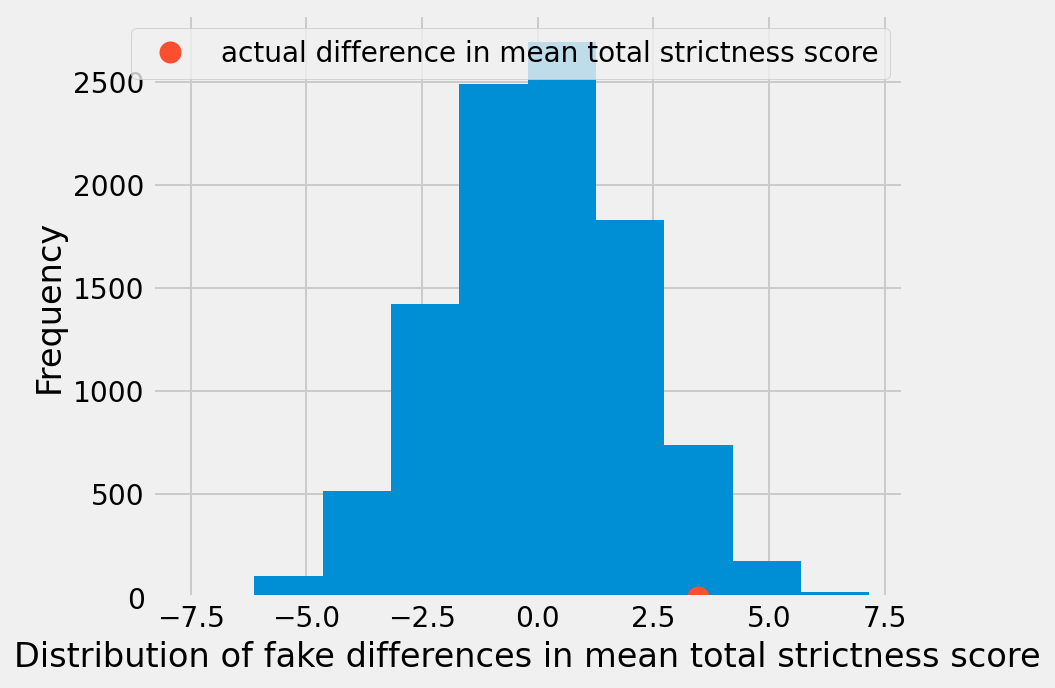

In [22]:
# Permutation
StrictnessScoresPerm = Drug_Laws_Leniency_Scoring_Mean_TotOnly.copy()
# Used decrim and crim country list names as indexs into strictness scores.
decriminalised_StrictScores = StrictnessScoresPerm.loc[decriminalised_countries]
criminalised_StrictScores = StrictnessScoresPerm.loc[criminalised_countries]

# Find scores for the 3 total columns for criminalised and decriminalised groups.
criminalised_total_score = criminalised_StrictScores['Total Strictness Score for Use and Possession']
decriminalised_total_score = decriminalised_StrictScores['Total Strictness Score for Use and Possession']
criminalised_use_score = criminalised_StrictScores['Total Strictness Score for Use']
decriminalised_use_score = decriminalised_StrictScores['Total Strictness Score for Use']
criminalised_poss_score = criminalised_StrictScores['Total Strictness Score for Possession']
decriminalised_poss_score = decriminalised_StrictScores['Total Strictness Score for Possession']

# Pool scores for the three totals
pooled_score_total = np.append(criminalised_total_score, decriminalised_total_score)
pooled_score_use = np.append(criminalised_use_score,decriminalised_use_score)
pooled_score_poss = np.append(criminalised_poss_score,decriminalised_poss_score)

# Find observed differences between criminalised and decriminalised groups.
actual_diff_total = np.mean(criminalised_total_score) - np.mean(decriminalised_total_score)
actual_diff_use = np.mean(criminalised_use_score) - np.mean(decriminalised_use_score)
actual_diff_poss = np.mean(criminalised_poss_score) - np.mean(decriminalised_poss_score)

# Find number of criminalised countries
num_crim = len(criminalised_total_score)

n_iters = 10000

# Create empty array to store fake differences in
fake_differences = np.zeros(n_iters*3).reshape(3,n_iters)
for i in range(n_iters):
    # Permute the three pools of scores
    shuffled_total = np.random.permutation(pooled_score_total)
    shuffled_use = np.random.permutation(pooled_score_use)
    shuffled_poss = np.random.permutation(pooled_score_poss)
    # Find fake differences between crim and decrim for the 3 totals
    fake_differences[0,i] = np.mean(shuffled_total[:num_crim]) - np.mean(shuffled_total[num_crim:])
    fake_differences[1,i] = np.mean(shuffled_use[:num_crim]) - np.mean(shuffled_use[num_crim:])
    fake_differences[2,i] = np.mean(shuffled_poss[:num_crim]) - np.mean(shuffled_poss[num_crim:])

# Find the proportion of times the fake differences equalled or exceeded the observed differences for the 3 totals.
prop_total = np.count_nonzero(fake_differences[0,:]>=actual_diff_total)/n_iters
prop_use = np.count_nonzero(fake_differences[1,:]>=actual_diff_use)/n_iters
prop_poss = np.count_nonzero(fake_differences[2,:]>=actual_diff_poss)/n_iters

print('The decriminalised countries had a lower mean total strictness score of ', np.round(actual_diff_total,2),' compared to criminalised countries. The permutation revealed the likelihood this difference could have occurred due to chance is ', prop_total, '.')

print('The decriminalised countries had a lower mean use strictness score of ', np.round(actual_diff_use,2),' compared to criminalised countries. The permutation revealed the likelihood this difference could have occurred due to chance is ', prop_use, '.')

print('The decriminalised countries had a higher mean possession strictness score of ', np.round(abs(actual_diff_poss),2),' compared to criminalised countries. The permutation revealed the likelihood this difference could have occurred due to chance is ', prop_poss, '.')

plt.figure(figsize = (6, 5))
plt.hist(fake_differences[0,:])
plt.plot(actual_diff_total, 1, 'o', markersize = 10, label = 'actual difference in mean total strictness score')
plt.xlabel('Distribution of fake differences in mean total strictness score')
plt.ylabel('Frequency')
plt.legend()



### **Question 2.3 - Does leniency help?**

Put countries in to categories based on scores of strictness and perform permutations between. 

Does legal leniency to users and possessors of drugs (the 'main' popularised idea of drug decriminalisation) associated with difference in overdose deaths, use offences or number of offenders?


#### Overdoses per Capita

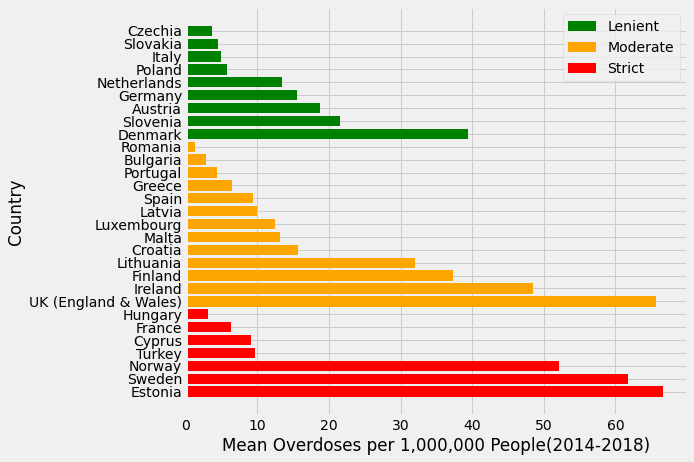

In [23]:
Image(filename='odleniencybarchart.png')

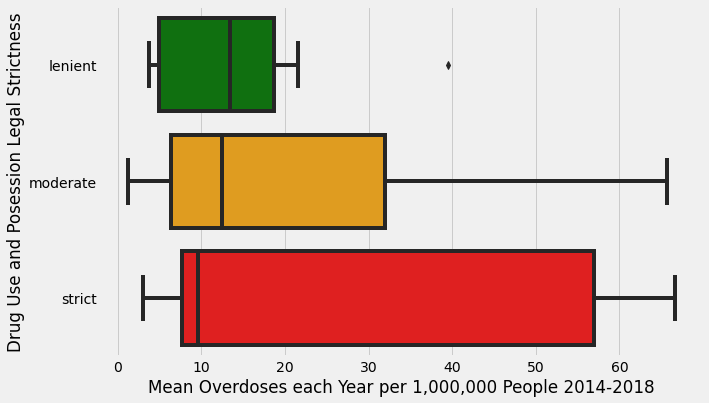

In [24]:
Image(filename='odleniencybxplt.png')

The boxplot clearly shows that countries who were classed as lenient had a much smaller interquartile range of overdose deaths per million people (indicated by the size of the box), as well as significantly smaller outliers. These are also reflected in the bar chart, which clearly shows the smaller range in bar size for the lenient countries compared to the others. The moderate and strict countries both had significantly larger outliers and interquartile ranges, with the countries classed as strict having an interquartile range of around double that of the moderate countries. This is corroborated in the bar chart, where we can see that both the moderate and strict groups had at least one country with a number of overdose deaths lower than the minimum number seen in the lenient group (Czechia), but we can also see that both groups have multiple countries with significantly higher overdose deaths than the maximum number seen in the lenient group (Denmark). Interestingly, the medians for all three groups look roughly similar, with the strict groups having the lowest. However, the permutation used to test for the effects of leniency on overdose deaths uses the mean as its main statistic, an average known for being more affected by outliers.

In [25]:
# Does leniency help? (Overdose deaths)
# Permutation test on number of overdose deaths between countries of different strictness.

# Rename United Kingdom column as overdose data only includes england and wales
overdosedeaths_2014_to_2018 = overdosedeaths_2014_to_2018.rename(columns={'United Kindgdom':'UK (England & Wales)'}).copy()

# Create 3 groups (lists) based on labels from leniency scoring DataFrame
lenient_countries = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly[Drug_Laws_Leniency_Scoring_Mean_TotOnly['Category']=='Lenient'].index)
moderate_countries = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly[Drug_Laws_Leniency_Scoring_Mean_TotOnly['Category']=='Moderate'].index)
# Rename UK column as overdose deaths only includes England and Wales.
moderate_countries_od = moderate_countries.replace('United Kingdom','UK (England & Wales)')
strict_countries = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly[Drug_Laws_Leniency_Scoring_Mean_TotOnly['Category']=='Strict'].index)


# Use groups to fetch overdose data.
lenient_od = overdosedeaths_2014_to_2018[lenient_countries]
moderate_od = overdosedeaths_2014_to_2018[moderate_countries_od]
strict_od = overdosedeaths_2014_to_2018[strict_countries]

# Calculate 2014 - 2018 mean for each country
lenient_means = lenient_od.mean()
moderate_means = moderate_od.mean()
strict_means = strict_od.mean()

# Calculate mean for group
lenient_total_mean = np.mean(lenient_means)
moderate_total_mean = np.mean(moderate_means)
strict_total_mean = np.mean(strict_means)


# Find actual differences between groups
lenient_moderate_differece = moderate_total_mean - lenient_total_mean
lenient_strict_difference = strict_total_mean - lenient_total_mean
moderate_strict_difference = strict_total_mean - moderate_total_mean

# Check/prove the metric means go in the observed order of lenient, moderate, strict (ascending)
if (lenient_total_mean < moderate_total_mean) & (lenient_total_mean < strict_total_mean):
    print('Countries who were classed as lenient by the scale for Total Score for Use and Possession had a mean number of overdose deaths of',np.round(lenient_total_mean,2), 'per million people. Countries who were classed as moderate had a mean number of overdose deaths of', np.round(moderate_total_mean,2),'per million people. Countries who were classed as strict had a mean number of overdose deaths of',np.round(strict_total_mean,2),'per million people.')


# Pool means for permutation
pooled_means1 = np.append(lenient_means, moderate_means)
pooled_means = np.append(pooled_means1, strict_means)
# Belgium was all NaN's so its  mean needs to be dropped
pooled_means = pooled_means[np.argwhere(np.isnan(pooled_means)==False)]

n_iters = 10000
# Create empty arrays to fill
fake_lenient_mins = np.zeros(n_iters)
fake_lenient_moderate_diffs = np.zeros(n_iters)
fake_lenient_strict_diffs = np.zeros(n_iters)
fake_moderate_strict_diffs = np.zeros(n_iters)

for i in range(n_iters):
    # Shuffle means
    shuffled_means = np.random.permutation(pooled_means)
    # Create fake group means
    fake_lenient_mean = np.mean(shuffled_means[len(lenient_means)])
    fake_moderate_mean = np.mean(shuffled_means[len(moderate_means)])
    fake_strict_mean = np.mean(shuffled_means[len(strict_means)])
    # Calculate fake differences
    fake_lenient_moderate_diffs[i] = fake_moderate_mean - fake_lenient_mean
    fake_lenient_strict_diffs[i] = fake_strict_mean - fake_lenient_mean
    fake_moderate_strict_diffs[i] = fake_strict_mean - fake_moderate_mean
    # First check the order is the same as what was actually observed (lenient,moderate,strict)
    if (fake_lenient_mean < fake_moderate_mean) & (fake_lenient_mean<fake_strict_mean) & (fake_moderate_mean<fake_strict_mean):
        # If the order is the same, check if the differences between the groups equal/exceed the actual observed value.
        if (fake_lenient_moderate_diffs[i]>=lenient_moderate_differece) & (fake_moderate_strict_diffs[i]>moderate_strict_difference):
            # If all conditions are met save value as 1.
            fake_lenient_mins[i] = 1
    else:
        fake_lenient_mins[i] = 0
        
# Calculate proportions of times the smaller group exceeded the larger. (Out of interest)
prop_lenmod = np.count_nonzero(fake_lenient_moderate_diffs > lenient_moderate_differece)/n_iters
prop_lenstrict = np.count_nonzero(fake_lenient_strict_diffs > lenient_strict_difference)/n_iters
prop_modstrict = np.count_nonzero(fake_moderate_strict_diffs > moderate_strict_difference)/n_iters


# Calculates proportion of times the observed results (order + size of differences) for overdoses occurred in the permutation.
prop_mins = np.count_nonzero(fake_lenient_mins)/n_iters


print('\n The difference between the lenient and the moderate groups was',np.round(lenient_moderate_differece,2),'\n The difference between the lenient and the strict groups was ',(np.round(lenient_strict_difference,2)),'\n The difference between the moderate and the strict groups was',np.round(moderate_strict_difference,2),'. \n The strict countries had the highest number of mean overdose deaths, followed by the moderate countries. The lenient countries had the least mean overdose deaths out of all three groups, and had the lowest mean deaths by',np.round(lenient_moderate_differece,2),'overdose deaths per million people. The permutation test indicated that the likelihood that this order occurred due to chance was',np.round(prop_mins,4),'.This indicates that there is a',np.round(prop_mins*100,2),'% probability that the difference between the lenient and the moderate group was due to chance when the three groups were in this order for mean overdose deaths.')


Countries who were classed as lenient by the scale for Total Score for Use and Possession had a mean number of overdose deaths of 14.18 per million people. Countries who were classed as moderate had a mean number of overdose deaths of 19.93 per million people. Countries who were classed as strict had a mean number of overdose deaths of 29.8 per million people.



 The difference between the lenient and the moderate groups was 5.75 
 The difference between the lenient and the strict groups was  15.62 
 The difference between the moderate and the strict groups was 9.87 . 
 The strict countries had the highest number of mean overdose deaths, followed by the moderate countries. The lenient countries had the least mean overdose deaths out of all three groups, and had the lowest mean deaths by 5.75 overdose deaths per million people. The permutation test indicated that the likelihood that this order occurred due to chance was 0.0575 .This indicates that there is a 5.75 % probability that the difference between the lenient and the moderate group was due to chance when the three groups were in this order for mean overdose deaths.


#### Use Offences per Capita

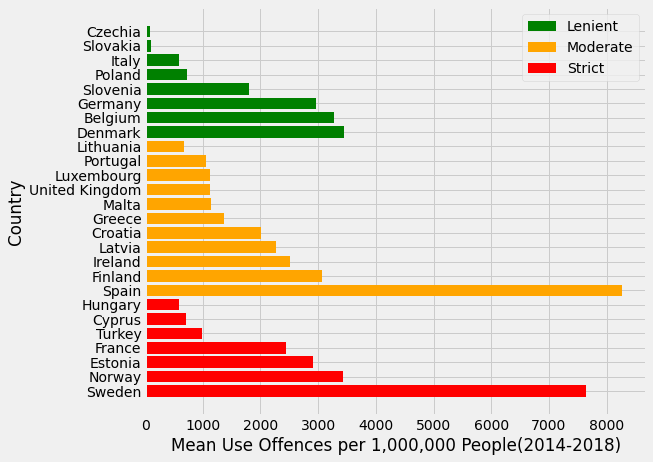

In [26]:
Image(filename='useoffleniencybarchart.png')

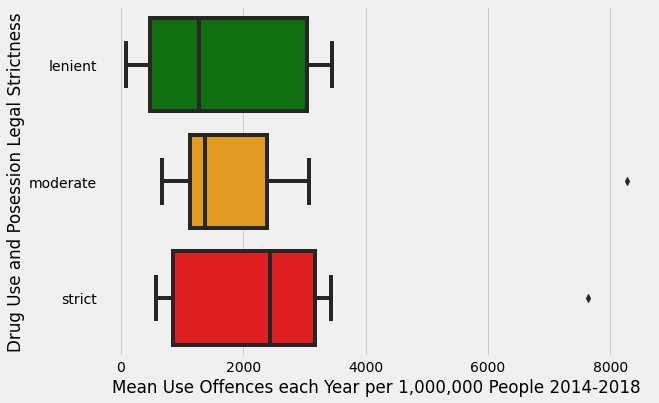

In [27]:
Image(filename='useoffleniencybxplt.png')

As shown in the boxplot, the countries classed as lenient had the lowest median number of drug use offences, as well as the lowest outlier and first quartile. However they also saw the highest interquartile range for the number of use offences in 2018, as well as having the greatest outliers. This is hardly surprising when looking at the bar chart, which clearly shows the large difference in mean overdose deaths between Czechia and Denmark, both of which were classed as lenient. The moderate countries had the smallest interquartile range and outliers, whereas the strict countries' were somewhere in-between. The strict countries also had the largest median of the three groups, although once again the permutation below used the mean, which would produce a different average to the one shown graphically above.

In [28]:
# Permutation test on number of drug use offences.
# Austria, Netherlands, Romania & Bulgaria had data that was almost exclusively NaN's, so they were dropped.
Drug_Laws_Leniency_Scoring_Mean_TotOnly_use = Drug_Laws_Leniency_Scoring_Author_TotOnly.drop(['Austria','Netherlands','Romania','Bulgaria'],axis=0).copy()

# Create groups using category labels
lenient_countries_use = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_use[Drug_Laws_Leniency_Scoring_Mean_TotOnly_use['Category']=='Lenient'].index)
moderate_countries_use = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_use[Drug_Laws_Leniency_Scoring_Mean_TotOnly_use['Category']=='Moderate'].index)
strict_countries_use = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_use[Drug_Laws_Leniency_Scoring_Mean_TotOnly_use['Category']=='Strict'].index)


# Use groups to fetch overdose data.
lenient_countries_use = use_offences_per_capita_2014_to_2018[lenient_countries_use]
moderate_countries_use = use_offences_per_capita_2014_to_2018[moderate_countries_use]
strict_countries_use = use_offences_per_capita_2014_to_2018[strict_countries_use]

# Calculate 2014 - 2018 mean for each country
lenient_means_use = lenient_countries_use.mean()
moderate_means_use = moderate_countries_use.mean()
strict_means_use = strict_countries_use.mean()

# Calculate the mean number of use offences for each group.
lenient_total_mean_use = np.mean(lenient_means_use)
moderate_total_mean_use = np.mean(moderate_means_use)
strict_total_mean_use = np.mean(strict_means_use)

# Find the observed differences between the three groups.
lenient_moderate_differece_use = moderate_total_mean_use - lenient_total_mean_use
lenient_strict_difference_use = strict_total_mean_use - lenient_total_mean_use
moderate_strict_difference_use = strict_total_mean_use - moderate_total_mean_use

# Use this step to find/show the order of the groups for mean use offences.
if (lenient_total_mean_use < moderate_total_mean_use) & (lenient_total_mean_use < strict_total_mean_use):
    print('Countries who were classed as lenient by the scale for Total Score for Use and Possession had the lowest mean number of drug use offences at',np.round(lenient_total_mean_use,2), 'per million people. This is',np.round(lenient_moderate_differece_use,2),'less than the countries who were classed as moderate, who had a mean number of use offences of', np.round(moderate_total_mean_use,2),'per million people. And it is',np.round(lenient_strict_difference_use,2),'less than countries who were classed as strict, who had a mean number of use offences of',np.round(strict_total_mean_use,2),'per million people.')


# Pool means for permutation against eachother.
pooled_means_use = np.append(lenient_means_use, moderate_means_use)
pooled_means_use = np.append(pooled_means_use, strict_means_use)

n_iters = 10000
# Create array for determining final statistic.
fake_lenient_mins_use = np.zeros(n_iters)
# Create fake arrays of differences
fake_lenient_moderate_diffs_use = np.zeros(n_iters)
fake_lenient_strict_diffs_use = np.zeros(n_iters)
fake_moderate_strict_diffs_use = np.zeros(n_iters)

for i in range(n_iters):
    # Shuffle all the means.
    shuffled_means_use = np.random.permutation(pooled_means_use)
    #Create the 3 fake groups
    fake_lenient_mean_use = np.mean(shuffled_means_use[len(lenient_means_use)])
    fake_moderate_mean_use = np.mean(shuffled_means_use[len(moderate_means_use)])
    fake_strict_mean_use = np.mean(shuffled_means_use[len(strict_means_use)])
    # Create the fake differences
    fake_lenient_moderate_diffs_use[i] = fake_moderate_mean_use - fake_lenient_mean_use
    fake_lenient_strict_diffs_use[i] = fake_strict_mean_use - fake_lenient_mean_use
    fake_moderate_strict_diffs_use[i] = fake_strict_mean_use - fake_moderate_mean_use
    # Check if fake means go in the observed order.
    if (fake_lenient_mean_use < fake_moderate_mean_use) & (fake_lenient_mean_use<fake_strict_mean_use) & (fake_moderate_mean_use<fake_strict_mean_use):
        # If the order is the same, check if the difference between the groups exceed the actual observed values.
        if (fake_lenient_moderate_diffs_use[i]>=lenient_moderate_differece_use) & (fake_moderate_strict_diffs_use[i]>moderate_strict_difference_use):
            # If observed conditions are met, save value as 1.
            fake_lenient_mins_use[i] = 1
    else:
        fake_lenient_mins_use[i] = 0


prop_lenmod_use = np.count_nonzero(fake_lenient_moderate_diffs_use > lenient_moderate_differece_use)/n_iters
prop_lenstrict_use = np.count_nonzero(fake_lenient_strict_diffs_use > lenient_strict_difference_use)/n_iters
prop_modstrict_use = np.count_nonzero(fake_moderate_strict_diffs_use > moderate_strict_difference_use)/n_iters

# Calculates proportion of times the observed results (order + size of differences) for use offences occurred in the permutation.
prop_mins_use = np.count_nonzero(fake_lenient_mins_use)/n_iters

print('The difference between the lenient and the moderate groups was',np.round(lenient_moderate_differece_use,2),'\n The difference between the lenient and the strict groups was ',(np.round(lenient_strict_difference_use,2)),'\n The difference between the moderate and the strict groups was',np.round(moderate_strict_difference_use,2),'.\n The strict countries had the highest number of drug use offences, followed by the moderate countries. The lenient countries had the least mean use offences out of all three groups, and had the lowest mean use offences by',np.round(lenient_moderate_differece_use,2),'use offences per million people. The permutation test indicated that likelihood that this occurred due to chance was',prop_mins_use,'. This indicates that there is a 6% probability that the difference between the lenient and the moderate group was due to chance when the three groups were in this order for mean use offences. \n')


Countries who were classed as lenient by the scale for Total Score for Use and Possession had the lowest mean number of drug use offences at 1521.06 per million people. This is 970.52 less than the countries who were classed as moderate, who had a mean number of use offences of 2491.58 per million people. And it is 1149.93 less than countries who were classed as strict, who had a mean number of use offences of 2671.0 per million people.


The difference between the lenient and the moderate groups was 970.52 
 The difference between the lenient and the strict groups was  1149.93 
 The difference between the moderate and the strict groups was 179.42 .
 The strict countries had the highest number of drug use offences, followed by the moderate countries. The lenient countries had the least mean use offences out of all three groups, and had the lowest mean use offences by 970.52 use offences per million people. The permutation test indicated that likelihood that this occurred due to chance was 0.0588 . This indicates that there is a 6% probability that the difference between the lenient and the moderate group was due to chance when the three groups were in this order for mean use offences. 




#### Number of Offenders per Capita


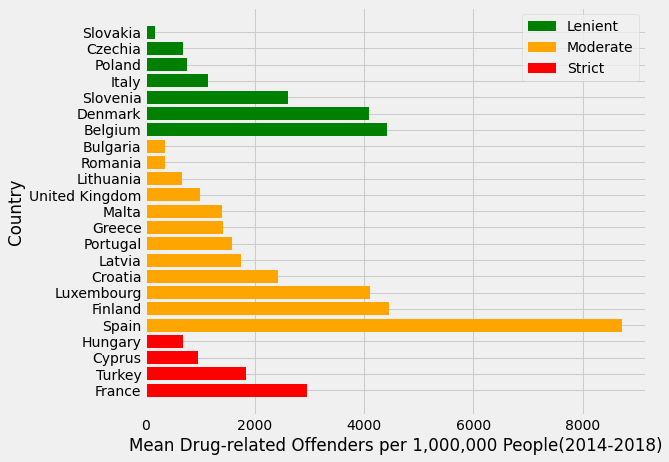

In [29]:
Image(filename='offleniencybarchart.png')

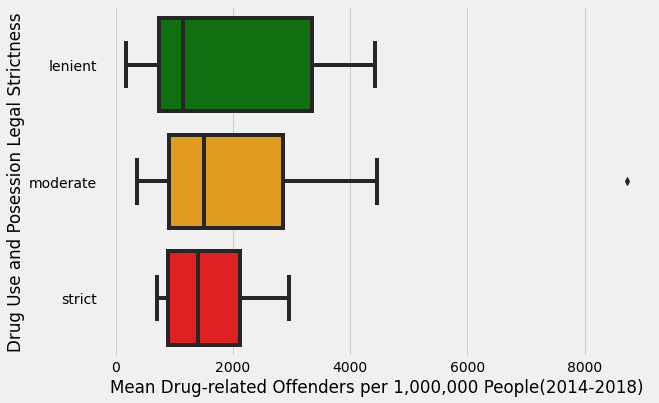

In [30]:
Image(filename='offleniencybxplt.png')

The boxplot shows that the countries classed as lenient had the largest interquartile range as well as the largest range of outliers, this is shown in the bar chart, where the large difference between Slovakia and Belgium for number of offenders can be seen. The strict countries had the shortest interquartile range, as well as the shortest range of outliers. This may be due to the smaller sample size of 4 countries, shown in the bar chart. However it's also possible that this reduced variance and number of offenders was for a reason, which is explored in the permutation below.

In [31]:
# Permutation for number of Offenders
# Countries that had majority/all data being NaN's were dropped.
Drug_Laws_Leniency_Scoring_Mean_TotOnly_off = Drug_Laws_Leniency_Scoring_Mean_TotOnly.drop(['Austria','Germany','Netherlands','Ireland','Estonia','Norway','Sweden'],axis=0).copy()
# Rename column back to UK to include Scotland/NIreland
Drug_Laws_Leniency_Scoring_Mean_TotOnly_off = Drug_Laws_Leniency_Scoring_Mean_TotOnly_off.rename(index={"UK (England & Wales)": "United Kingdom"})

# Create groups using category from leniency table.
lenient_countries_offend = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_off[Drug_Laws_Leniency_Scoring_Mean_TotOnly_off['Category']=='Lenient'].index)
moderate_countries_offend = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_off[Drug_Laws_Leniency_Scoring_Mean_TotOnly_off['Category']=='Moderate'].index)
strict_countries_offend = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_off[Drug_Laws_Leniency_Scoring_Mean_TotOnly_off['Category']=='Strict'].index)


# Use groups to fetch overdose data.
lenient_countries_offend = offenders_per_capita_2014_to_2018[lenient_countries_offend]
moderate_countries_offend = offenders_per_capita_2014_to_2018[moderate_countries_offend]
strict_countries_offend = offenders_per_capita_2014_to_2018[strict_countries_offend]

# Calculate 2014 - 2018 mean for each country
lenient_means_offend = lenient_countries_offend.mean()
moderate_means_offend = moderate_countries_offend.mean()
strict_means_offend = strict_countries_offend.mean()

# Calculate mean number of offenders for each group
lenient_total_mean_offend = np.mean(lenient_means_offend)
moderate_total_mean_offend = np.mean(moderate_means_offend)
strict_total_mean_offend = np.mean(strict_means_offend)

# Calculate observed differences between the groups.
lenient_moderate_differece_offend = moderate_total_mean_offend - lenient_total_mean_offend
moderate_strict_difference_offend = strict_total_mean_offend - moderate_total_mean_offend
lenient_strict_difference_offend = strict_total_mean_offend - lenient_total_mean_offend

# Find/report the order of the groups or mean number of drug crime offenders
if (lenient_total_mean_offend < moderate_total_mean_offend) & (lenient_total_mean_offend > strict_total_mean_offend) & (moderate_total_mean_offend>strict_total_mean_offend):
    print('Countries who were classed as strict by the scale for Total Score for Use and Possession had the lowest mean number of drug use offences at',np.round(strict_total_mean_offend,2), 'per million people. This is',np.round(moderate_strict_difference_offend,2),'less than the countries who were classed as moderate, who had a mean number of use offences of', np.round(moderate_total_mean_offend,2),'per million people. And it is',np.round(lenient_strict_difference_offend,2),'less than countries who were classed as lenient, who had a mean number of use offences of',np.round(lenient_total_mean_offend,2),'per million people.')


# Pool means for permutation.
pooled_means_offend = np.append(lenient_means_offend, moderate_means_offend)
pooled_means_offend = np.append(pooled_means_offend, strict_means_offend)

n_iters = 10000
# Create array for final statistic
fake_lenient_mins_offend = np.zeros(n_iters)
# Empty arrays for fake differences
fake_lenient_moderate_diffs_offend = np.zeros(n_iters)
fake_lenient_strict_diffs_offend = np.zeros(n_iters)
fake_moderate_strict_diffs_offend = np.zeros(n_iters)
orders = np.zeros(n_iters)

for i in range(n_iters):
    # Permuate the means for number of offenders
    shuffled_means_offend = np.random.permutation(pooled_means_offend)
    # Calculate fake means for each group
    fake_lenient_mean_offend = np.mean(shuffled_means_offend[len(lenient_means_offend)])
    fake_moderate_mean_offend = np.mean(shuffled_means_offend[len(moderate_means_offend)])
    fake_strict_mean_offend = np.mean(shuffled_means_offend[len(strict_means_offend)])
    # Calculate fake differenecs
    fake_lenient_moderate_diffs_offend[i] = fake_moderate_mean_offend - fake_lenient_mean_offend
    fake_lenient_strict_diffs_offend[i] = fake_strict_mean_offend - fake_lenient_mean_offend
    fake_moderate_strict_diffs_offend[i] = fake_strict_mean_offend - fake_moderate_mean_offend
    # First check if order is the same as was actually observed (strict lowest, moderate highest)
    if (fake_lenient_mean_offend < fake_moderate_mean_offend) & (fake_strict_mean_offend<fake_lenient_mean_offend) & (fake_strict_mean_offend<fake_moderate_mean_offend):
        orders[i] = 1
    else:
        orders[i] = 0
        # If the order is the same, check if the difference between the groups exceed the actual observed value.
        # Use abs to deal with negative numbers more easily
        if (fake_lenient_moderate_diffs_offend[i]>=abs(lenient_moderate_differece_offend)) & (fake_moderate_strict_diffs_offend[i]>=abs(moderate_strict_difference_offend)) & (fake_lenient_strict_diffs_offend[i]>=abs(lenient_strict_difference_offend)):
            # If observed conditions are met, save value as 1
            fake_lenient_mins_offend[i] = 1
        else:
            fake_lenient_mins_offend[i] = 0

prop_lenmod_offend = np.count_nonzero(fake_lenient_moderate_diffs_offend > lenient_moderate_differece_offend)/n_iters
prop_lenstrict_offend = np.count_nonzero(fake_lenient_strict_diffs_offend > lenient_strict_difference_offend)/n_iters
prop_modstrict_offend = np.count_nonzero(fake_moderate_strict_diffs_offend > moderate_strict_difference_offend)/n_iters

# Calculates proportion of times the observed results (order + difference size) occurred in the permutation for number of drug crime offenders.
prop_mins_offend = np.count_nonzero(fake_lenient_mins_offend)/n_iters
prop_orders = np.count_nonzero(orders)/n_iters

print(' \n The difference between the lenient and the moderate groups was',np.round(lenient_moderate_differece_offend,2),'\n The difference between the lenient and the strict groups was ',(np.round(lenient_strict_difference_offend,2)),'\n The difference between the moderate and the strict groups was',np.round(moderate_strict_difference_offend,2),'.\n The moderate countries had the highest number of drug crime offenders, followed by the lenient countries. The strict countries had the least mean drug crime offenders out of all three groups, and had the lowest mean offenders by',np.round(lenient_strict_difference_offend,2),'offenders per million people. The permutation test indicated that likelihood that this occurred due to chance was',prop_mins_offend,'. This indicates that there is a',np.round(prop_mins_offend*100,2), '% probability that the difference between the strict and the moderate/lenient groups was due to chance when the three groups were in this order for mean number of drug crime offenders.')


Countries who were classed as strict by the scale for Total Score for Use and Possession had the lowest mean number of drug use offences at 1619.15 per million people. This is -738.71 less than the countries who were classed as moderate, who had a mean number of use offences of 2357.86 per million people. And it is -367.08 less than countries who were classed as lenient, who had a mean number of use offences of 1986.22 per million people.


 
 The difference between the lenient and the moderate groups was 371.63 
 The difference between the lenient and the strict groups was  -367.08 
 The difference between the moderate and the strict groups was -738.71 .
 The moderate countries had the highest number of drug crime offenders, followed by the lenient countries. The strict countries had the least mean drug crime offenders out of all three groups, and had the lowest mean offenders by -367.08 offenders per million people. The permutation test indicated that likelihood that this occurred due to chance was 0.0772 . This indicates that there is a 7.72 % probability that the difference between the strict and the moderate/lenient groups was due to chance when the three groups were in this order for mean number of drug crime offenders.


## Results

# Section 2.1

Only Malta and Portugal were scored as a different category of strictness, moderate rather than lenient, by the mean participants law leniency scoring versus the author scoring. This suggests that interpretations of laws based on the key is fairly consistent and lends strengths to the index in its use in analysis.


# Section 2.2
Permutation tests were used to determine whether decriminalised countries were classed as 'more lenient' by our scale. The countries were first separated into criminalised and decriminalised groups, the average strictness scores were calculated between the groups. Next permutations were done on the total values from the strictness scale for each country. As there were three different totals for the scale per country (Use+Possession, Use, Possession), this resulted in three separate permutations testing whether the differences in strictness scores between the decriminalised and criminalised groups were due to chance.

The decriminalised countries had a lower mean total strictness (Use & Possession) score by 3.46 compared to the criminalised countries. The permutation indicated that there was a 5.01% probability that this difference could have occurred due to chance. Therefore we can be confident that the lower mean total strictness scores in the decriminalised group was not due to chance. Similarly, the decriminalised group had a lower mean total Use Strictness score by 3.32, with the permutation revealing that there was a 2.87% chance that this difference could have occurred due to chance, meaning we can be confident that the lower Use Strictness scores in the decriminalised group were not due to chance. The decriminalised countries had a lower total Possession Strictness score by 0.14, however the permutation revealed that there was a 40.2% chance this difference could have occurred due to chance. The observed difference being so small, combined with the high probability it was due to chance, indicates there was no difference between the criminalised and decriminalised groups in Possession Strictness.

Overall these results suggest that countries that decriminalise drugs are more lenient regarding the treatment of use offences compared to criminalised countries, but are similar when it comes to the treatment of possession offences.

# Section 2.3
To test whether countries classed as lenient by the scale scored lower on the metrics of drug related issues, permutations were performed on the mean values of the three metrics. The permutations would calculate fake means for the metric in question for each of the three groups and find the differences between them. As the permutations were dealing with three groups (lenient, moderate, & strict), the permutations were designed to first test if the fake means were ordered in the same way as the observed means for that metric, if the order was the same the permutation would then determine whether the differences between the groups equaled or exceeded those observed in the real data. If both of these conditions were satisfied, the iteration was saved as a value of 1, the permutation ended by dividing the total number of 1's in the output by the number of iterations. The required satisfaction of both of these conditions was done to reflect a round of permutation that had successfully recreated the results in the observed data, with it being necessary to confirm both the order and the size of the differences to reflect this.

# Overdose Deaths
Lenient - 14.18 deaths per million people

Moderate - 19.93 deaths per million people

Strict - 29.8 deaths per million people

Countries who were classed as lenient by the scale had the lowest mean number of overdose deaths (per million people), followed by the countries classed as moderate, and finally with the countries classed as strict having the highest. Lenient countries' mean overdose deaths were lower than the moderate countries by 5.75 deaths, and than the strict by 15.62 deaths. The moderate countries had a lower mean number of overdose deaths than the strict countries by 9.87 deaths per million people.

The permutation indicated that the likelihood of the groups being in this order for mean overdose deaths, whilst simultaneously differing by the amounts described above, had a 0.06 likelihood of occurring due to chance. This indicates that there is a 6.09% probability that the difference between the groups, and their ordering for mean overdose deaths, was due to chance. Therefore, we can be reasonably confident that the results were not due to chance, which suggests that countries who are classed as lenient by our scale saw a significant reduction in overdose deaths in 2018 compared to countries classed as moderate or strict.

# Use Offences
Lenient - 1521.06 per million people

Moderate - 2491.58 per million people

Strict - 2671.0 per million people

Countries who were classed as lenient by the scale had the lowest mean number of drug use offences (per million people), followed by the countries classed as moderate, and finally with the countries classed as strict having the most. Lenient countries' mean number of use offences were lower than the moderate countries by 970.52, and than the strict by 1149.93 offences. The moderate countries had a lower mean number of drug use offences than the strict countries by 179.42 drug use offences per million people.

The permutation indicated that the likelihood of the groups being in this order for mean number of drug use offences, whilst simultaneously differing by the amounts described above, had a 0.0607 likelihood of occurring due to chance. This indicates that there is a 6.07% probability that the difference between the groups, and their ordering for mean number of use offences, was due to chance. Therefore, we can be reasonably confident that the results were not due to chance, which suggests that countries who are classed as lenient by our scale saw a significant reduction in drug use offences in 2018 compared to countries classed as moderate or strict.

# Number of Offenders
Lenient - 1986.22 per million people

Moderate - 2357.86 per million people

Strict - 1619.15 per million people

In a change from the other permutation, countries who were classed as strict by the scale had the lowest mean number of drug crime offenders (per million people), followed by the countries classed as lenient, and finally with the countries classed as lenient having the most. Strict countries' mean number of use offences were lower than the moderate countries by 738.71 offenders, and than the lenient countries by 367.08 offences. The lenient countries had a lower mean number of drug use offences than the moderate countries by 371.63 drug use offences per million people.

The permutation indicated that the likelihood of the groups being in this order for mean number of drug crime offenders, whilst simultaneously differing by the amounts described above, had a 0.0792 likelihood of occurring due to chance. This indicates that there is a 7.92% probability that the difference between the groups, and their ordering for mean number of drug crime offenders, was due to chance. Therefore, we can be reasonably confident that the results were not due to chance, which suggests that countries who are classed as strict by our scale saw a significant increase in drug use offences in 2018 compared to countries classed as moderate or lenient.

This is an interesting finding, as we have already established that countries who are classed as lenient saw *less* drug overdose deaths and use offences compared to criminalised countries. This could suggest that the number of drug crime offenders is a problem less directly dealt with by drug decriminalistion, which doesn't cover things such as supply offences. It's even possible that supply offences could increase following decriminalisation, depending on the new laws, thanks to a reduction in perceived danger on behalf of both the users and distributors, although this is speculation and would require testing to assert properly.

However it must also be noted that the only countries classified as strict that were eligible for the permutation on number of offenders were Hungary, Cyprus, and Turkey. This means that the 'strict countries' group has a significantly smaller sample size than the moderate or lenient groups, this could have affected the results by giving the strict countries an unrealistically low mean number of drug crime offenders. However this is again speculation, and would need further testing with sufficient quality data to investigate further.

## Summary
The permutation allows us to assert with relatively high confidence that leniency of drug laws, based on classification from our scale, is associated with reductions in drug overdose deaths and the number of drug use offences as of 2018. Interestingly the permutation also found that drug leniency was negatively associated with the number of drug crime offenders, with the countries classed as strict having the least. The reasons for this could be attributed to supply offences, changes in demand following law change, or the relatively small sample in the data, all of which would require further testing to investigate.


## Conclusion

Decriminalisation of drugs is often used as a political buzzword, but has many potential meanings. Some pro-decriminalisation organisations put forward the aims of decriminalisation as to treat addiction as a health issue rather than a criminal one, so addicts and users can seek help they need without criminal repercussions. On a side note, they also tend to talk about reduced administrative burden on law enforcement, criminal justice systems and reduced incarceration numbers and costs. Our analyses sought to see if there was any truth to that, on a country-level scale rather than just in individual countries like had been done so often before. We chose EMCDDA (European Monitoring Centre for Drugs and Drug Addiction) data as it keeps comprehensive data for EU countries, as well as fairly standardised reporting in comparison to other datasets. Furthermore the organisational structure of the EU and the EMCDDA being a branch of the EU means that countries reported to standards and definitions set by the agency. One of the only problems is that it relies on the country to report its own accurate data. 
    
In order to focus our resources and efforts, three datasets were chosen as representative metrics for decriminalisations' aims set out previously. The analysis aimed to determine whether drug decriminalisation has a significant effect on the rates of overdose deaths (for addict and user health), the number of drug use offences (for addict and user criminal persecution AND administrative burden), and the number of drug crime offenders(for administrative burden) from the EMCDDA. Our data exploration is novel, as far as we can tell, as the EMCDDA seems to preferentially analyse countries' drug problems on case by case bases or not directly in the lens of decriminalisation or leniency.

We sought to answer whether decriminalisation had WORKED in comparison to other strategies on a general level for our metrics of 'success'. Permutations were used to test whether decriminalised countries saw lower values in the metrics than criminalised countries as of 2018. The permutation allowed us to assert with relative confidence that **decriminalised countries saw less drug overdose deaths on average by a decent margin than criminalised countries**, but did not allow us to discern any effects on use offences or the number of offenders that may not have simply been due to chance alone. However there was still a strong argument to be made that each country faces different situations and problems, and formal decriminalisation could still be one of many responses required to combat drug-related problems rather than a cure-all 'magic bullet'. So our analysis tested whether decriminalisation had an effect on the metrics at the time the decriminalisation laws were implemented for the specific country, by calculating the changes in the metrics from four years before the decriminalisation date to four years afterwards. The permutation allowed us to say with reasonably strong confidence that **decriminalisation very likely led to a large decrease in overdose deaths and moderate decrease in number of drug crime offenders at the time the law was implemented**. However the permutation did not reveal any effect of decriminalisation on the number of drug use offences. It is important to note that for 'Use Offences' and 'Number of Offenders' metrics only Poland and Croatia were analysable because of decriminalisation dates within the timeframes reported in the datasets, which could potentially skew results. Regressions were performed on the metrics for the decriminalised countries in order to compare the slopes before and after decriminalisation. Due to the data being non-linear, a regression was not the most suitable test. However the comparison of the slopes still provided some interesting insight into the metrics, revealing that four out the six countries slopes for overdose deaths went from positive to negative following decriminalisation. The regression also revealed that the slope for overdose deaths in Estonia decreased by a large amount, but still remained positive indicating a slowing in increase. This finding proved to be interesting when compared to the Estonia case study from the time. Estonia, having shown an increase in overdose deaths even after decriminalisation, most likely due to growing criminal networks of local fentanyl suppliers and supply from abroad, further suggests that decriminalisation **may not be a 'magic bullet' but could definitely be an important tool** in fighting overdose deaths and some drug-related problems as the rate of increase of overdose deaths per mil declined following decriminalisation, even if it only started decreasing after the fentanyl supply was limited in 2017.

It seems clear that decriminalisation as a label is fairly non-uniform and countries vary in approach, hence we sought to analyse the roots and ethos of decriminalisation. Legal leniency towards addicts and users seemed to be the basis of most drug decriminalisation processes outlined. To analyse use and possession laws, we created a scale of strictness for each relevant category and law. Countries were then analysed by their 'total' drug law strictness category for the three metrics we had identified to be indicative of drug-related problem success. After testing our reliability of the scale by filling it out ourselves and comparing to a mean volunteer's response (2), we decided that it was appropriate despite some minor flaws like some misweighting of certain law categories in the final score. Decriminalised countries were more lenient for use but similar for possession law strictness, although the difference was not large. This lends credence to the idea that 'decriminalisation' is more of a buzzword than anything, and that the 'devil is in the details'. The permutation test was designed to test the probability that the observed differences in, and order of, drug metric means between the strict, moderate, and lenient countries were due to chance. For each iteration the permutation calculated fake means for the three groups, and first checked whether the order was the same as observed in the real data. When this condition was satisfied, the permutation calculated whether the differences equalled or exceeded those seen in the real data, and with it checked that the complete observed results had been recreated. The permutation calculated the proportion of times the observed results were recreated, and thus the proportion of times the results occurred by chance. The permutation allows us to assert with relatively high confidence that **leniency of drug laws, based on classification from our scale, is associated with reductions in drug overdose deaths and the number of drug use offences as of 2018**. Interestingly, the permutation also tells us that ***strictness* classified according to our scale is associated with a *decrease* in the number of drug crime offenders**, showing an opposite trend to the other 2 metrics. The reasons for this finding could be due to changes in public and police behavior following decriminalisation, however the possibility that it occurred due to a comparatively low sample size cannot be outruled. This unexpected distribution further suggests that the idea of even lenience or severity in an approach is not binary in its application and either done correctly could possibly lead to positive results in certain metrics.

##### Decriminalisation is not a magic bullet, but can be a useful tool in paving the way to reducing overdose deaths and sometimes use offences. However the argument for decriminalisation of drugs to reduce administrative burden is relatively unsupported in our analysis. Countries could alternatively adopt a more lenient approach for use and possession, regardless of decriminalisation status, to see a more consistent potential reduction in overdoses, use offences, and number of offenders.

##### Footnote

A fairly large, unfortunately unpluggable hole, in our analysis raises itself in the form of De Facto decriminalisation or even De Facto leniency. This is where the courts or the police may choose not to prosecute an individual for a certain offence, while it still may remain illegal technically. This is most established in the Netherlands but is clearly operating at various different levels (especially with marijuana) in other countries and regions. There is no clear data for us to use for this, so it remains unresolved. There are also a myriad of other factors that may have influenced our results, for example sub-standard reporting from certain countries to the EMCDDA. Certain countries, especially those that we noticed to be traditionally more corrupt in Eastern Europe had extraordinarily suspicious (low) data especially for offences etc. In future analyses, we could limit countries statistically tested to those that rate over a certain measure on the CPI (Corruption Perception Index) etc. We also identified healthcare access, wealth, happiness, criminal establishment, criminal supply route strongholds, individual drug epidemics etc as potential factors that could influence these metrics or their accuracy in reporting. Future analyses could incorporate them.



** By Max Laverty and Ollie Cope ,2021**